# Modeling Wine Quality

## Overview

The Washington Winegrower's Association is would like to increase their performance in competitions. They have asked us to develop a model that can predict how well a wine can be expected to perform in competition based on it's chemical properties to help their wineries select wines to send to competition.

## Looking At Our Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
white = pd.read_csv('wines/WineQuality-WhiteWine.csv')
red = pd.read_csv('wines/WineQuality-RedWine.csv')

Since we want to create a single model, we will need to put these dataframes together. However, we will want our model to account for differences between red wine and white wine. To manage this, we will add a 'red' column and a 'white' column to indicate this.

In [3]:
white['white'] = 1
white['red'] = 0
red['white'] = 0
red['red'] = 1

Then we stack the two datasets on top of each other to create our full dataset.

In [4]:
df = pd.concat([white, red], ignore_index = True)

We've created a couple different visualizations to help see the relationships within our dataset.

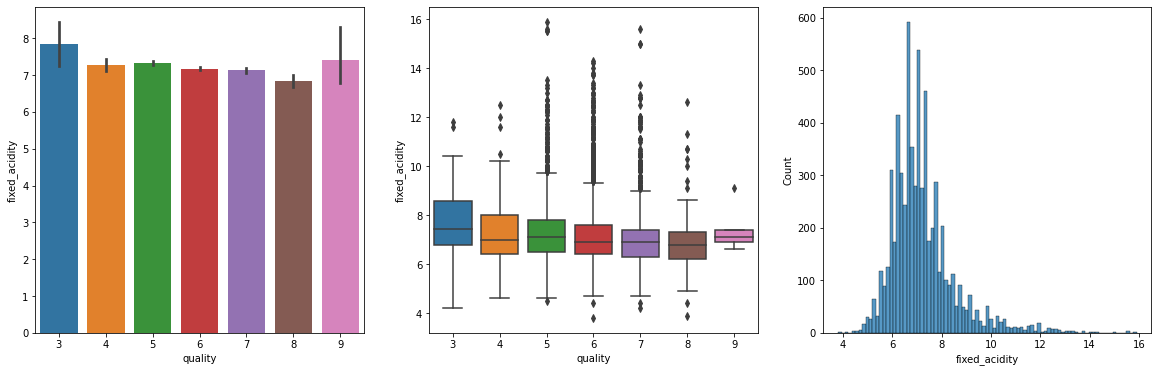

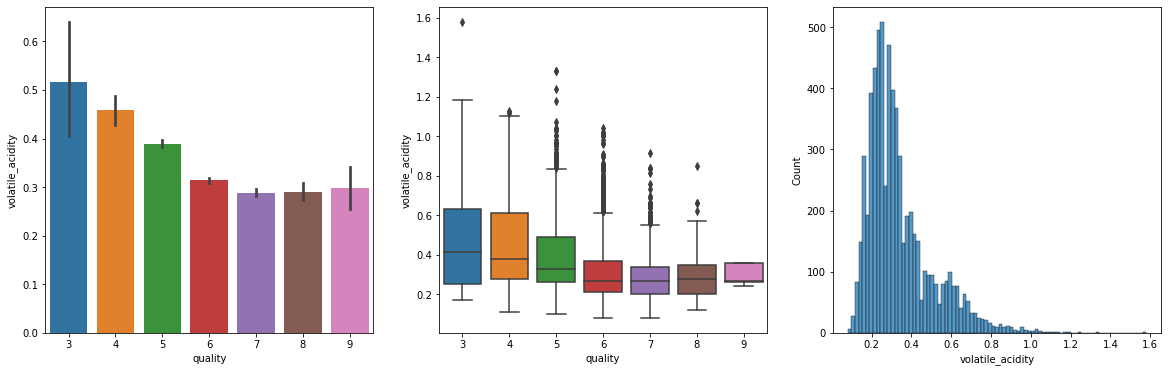

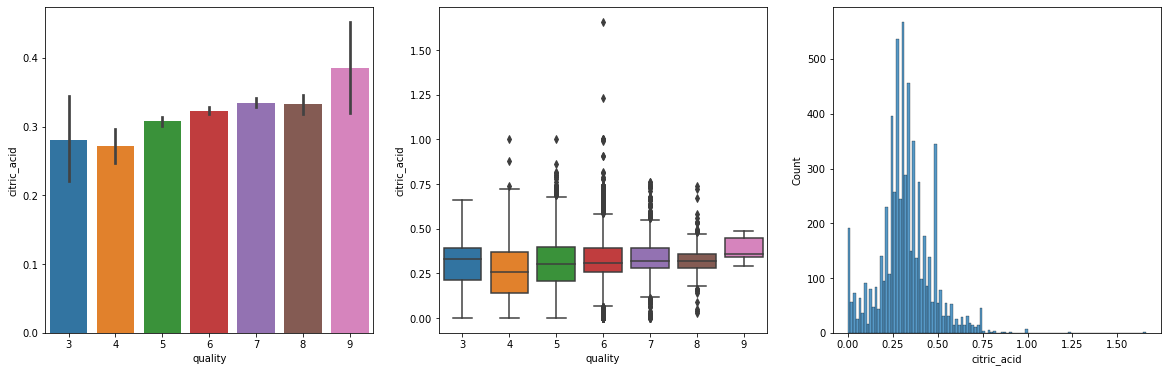

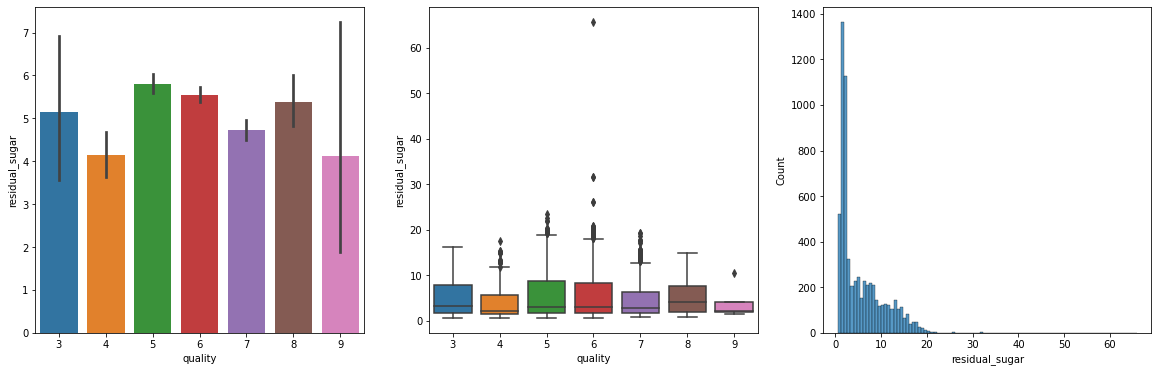

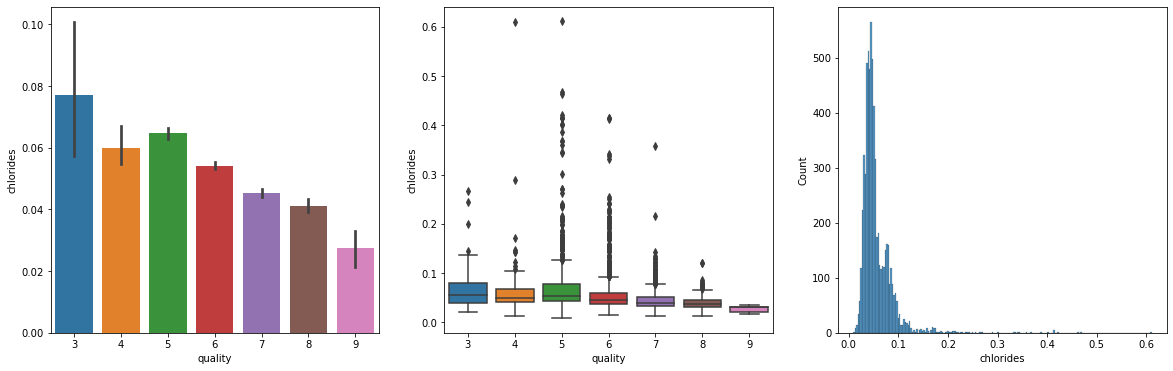

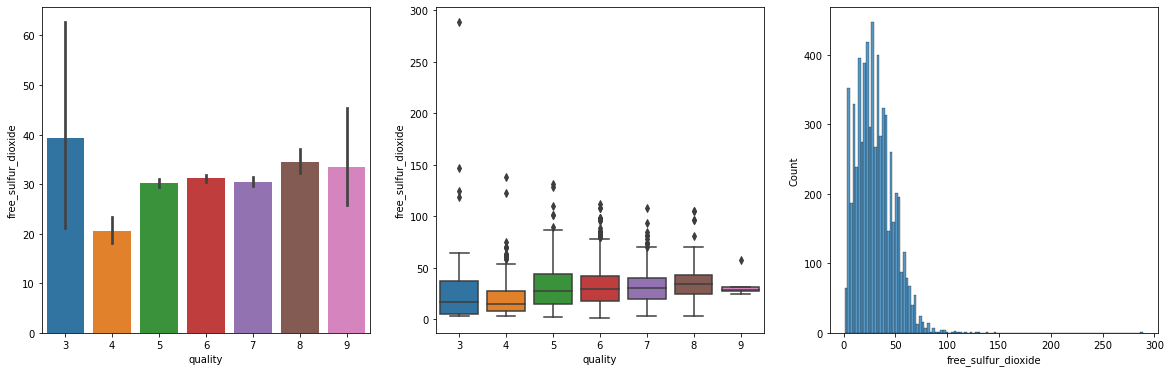

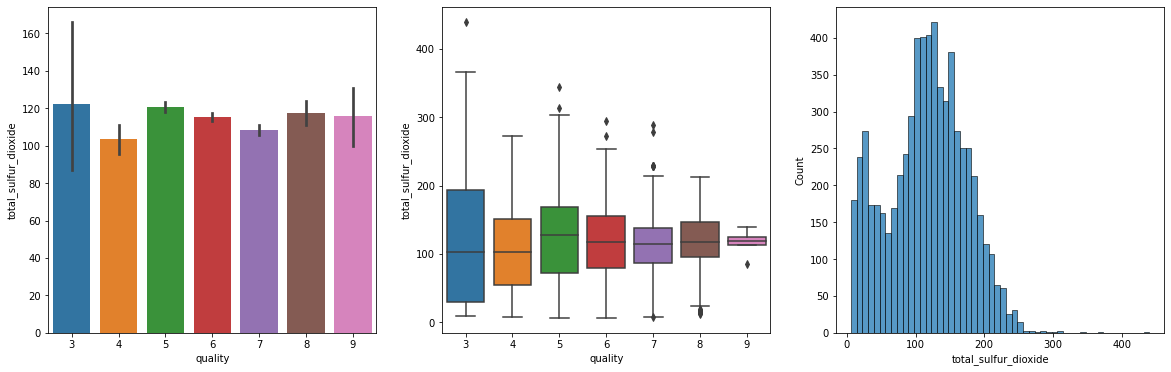

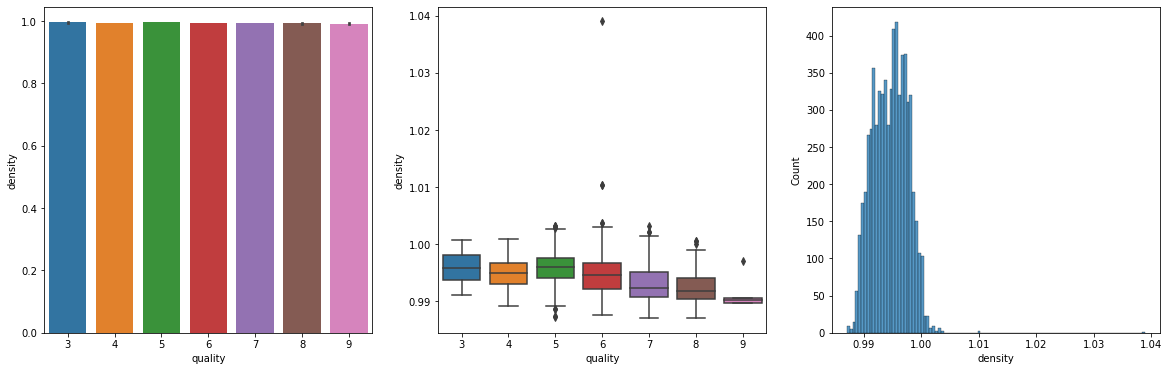

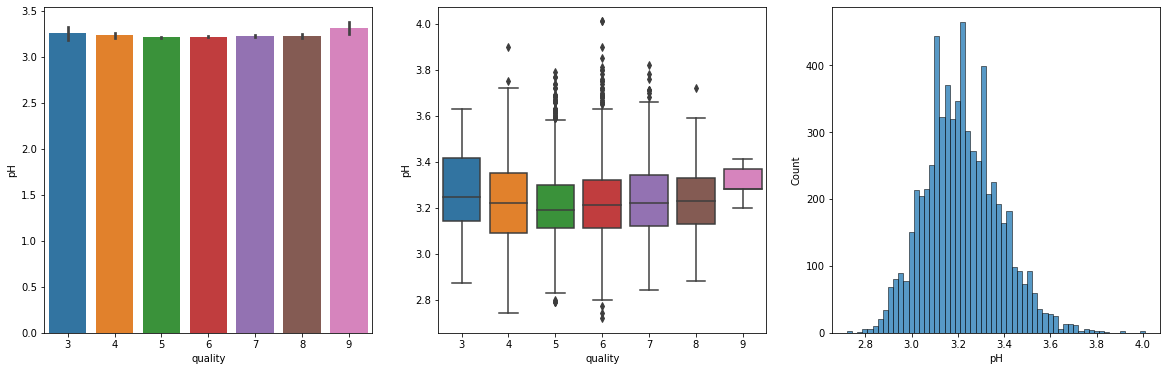

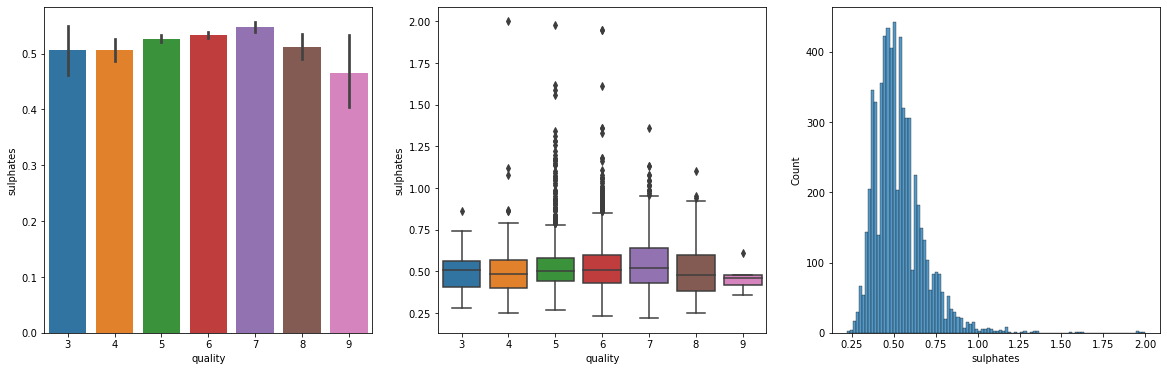

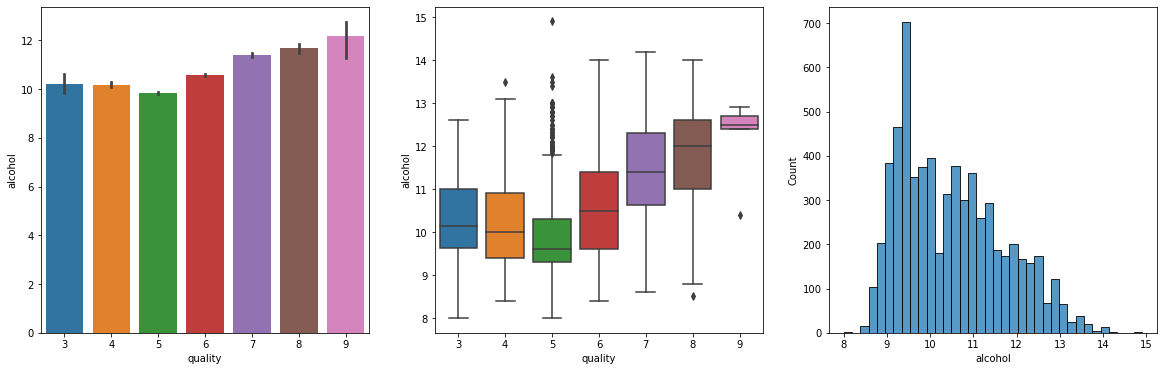

In [6]:
for column in df.iloc[:, :-3]:
    fig, ax = plt.subplots(1,3, figsize=(20, 6))
    sns.barplot(data=df, x='quality', y=column, ax=ax[0])
    sns.boxplot(data=df, x='quality', y=column, ax=ax[1])
    sns.histplot(data=df, x=column, ax=ax[2])
    plt.show()

## Train/Test Split

We will separate our data into training and testing subsets to validate our model when it is completed.

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=16)

## Baseline Model

Our first model willlook at all features with no transformations to establish a baseline which can be improved upon.

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
iteration_0 = list(df.columns)
iteration_0.remove('quality')

In [8]:
f = 'quality ~ '+ '+'.join(iteration_0)
model_1 = ols(formula=f, data=train).fit()

In [9]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     176.7
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:55:28   Log-Likelihood:                -5751.6
No. Observations:                5197   AIC:                         1.153e+04
Df Residuals:                    5184   BIC:                         1.161e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               67.2767     10.309      6.526      0.000      47.066      87.488
fixed_acidity            0.0806      0.017      4.634      0.000       0.047       0.115
volatile_acidity        -1.4949      0.090    -16.554      0.000      -1.672      -1.318
citric_acid             -0.0318      0.088     -0.360      0.719      -0.205       0.141
residual_sugar           0.0613      0.007      9.366      0.000       0.048       0.074
chlorides               -0.7078      0.378     -1.873      0.061      -1.448       0.033
free_sulfur_dioxide      0.0042      0.001      4.905      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -3.859      0.000      -0.002      -0.001
density               -100.0085     15.703     -6.369      0.000    -130.794     -69.223
pH                       0.4587      0.100      4.569      0.000       0.262       0.655
sulphates                0.7108      0.085      8.333      0.000       0.544       0.878
alcohol                  0.2188      0.020     10.988      0.000       0.180       0.258
white                   33.4601      5.138      6.512      0.000      23.387      43.533
red                     33.8165      5.171      6.539      0.000      23.678      43.955
==============================================================================
Omnibus:                      121.668   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.287
Skew:                          -0.030   Prob(JB):                     3.72e-61
Kurtosis:                       4.132   Cond. No.                     2.30e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

With an R-squared of 0.279, this model has plenty of room for improvement! P-values for citric acid, chlorides, and total sulfur dioxide are high, so I think it's wise to first check for collinearity.

In [10]:
predictors = train.iloc[:, :-3]

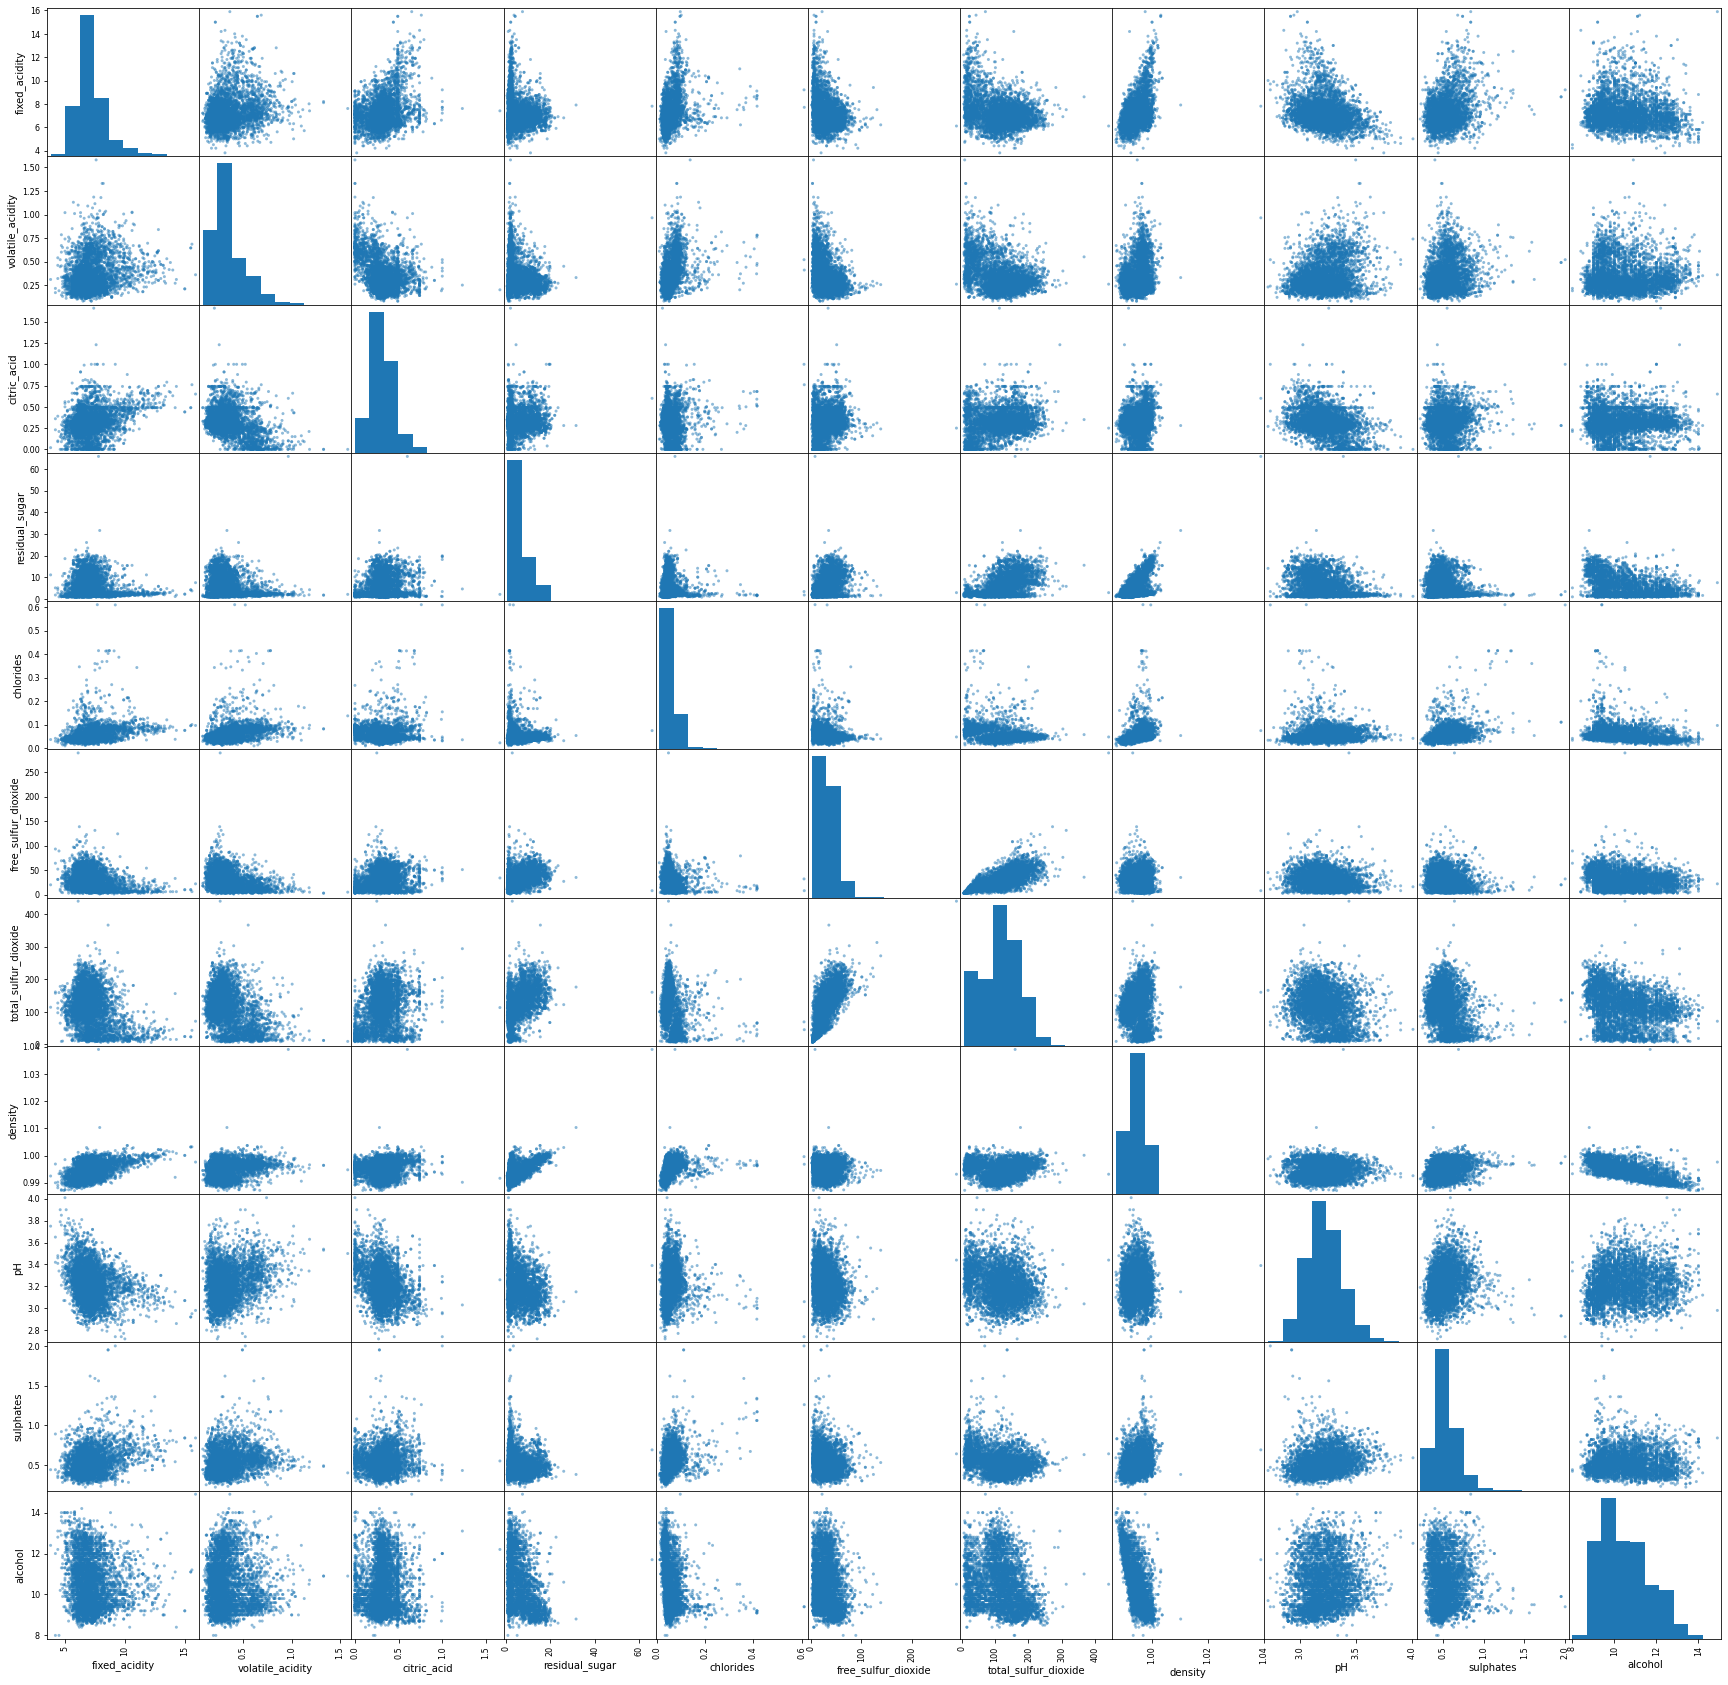

In [19]:
eda = pd.plotting.scatter_matrix(predictors, figsize  = [30,30]);

In [20]:
fig = eda.get_figure()
fig.savefig('scatterplot.png')

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

In [14]:
abs(predictors.corr()) >= 0.75

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity                  True             False        False   
volatile_acidity              False              True        False   
citric_acid                   False             False         True   
residual_sugar                False             False        False   
chlorides                     False             False        False   
free_sulfur_dioxide           False             False        False   
total_sulfur_dioxide          False             False        False   
density                       False             False        False   
pH                            False             False        False   
sulphates                     False             False        False   
alcohol                       False             False        False   
quality                       False             False        False   
white                         False             False        False   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity                  False      False                False   
volatile_acidity               False      False                False   
citric_acid                    False      False                False   
residual_sugar                  True      False                False   
chlorides                      False       True                False   
free_sulfur_dioxide            False      False                 True   
total_sulfur_dioxide           False      False                False   
density                        False      False                False   
pH                             False      False                False   
sulphates                      False      False                False   
alcohol                        False      False                False   
quality                        False      False                False   
white                          False      False                False   

                      total_sulfur_dioxide  density     pH  sulphates  \
fixed_acidity                        False    False  False      False   
volatile_acidity                     False    False  False      False   
citric_acid                          False    False  False      False   
residual_sugar                       False    False  False      False   
chlorides                            False    False  False      False   
free_sulfur_dioxide                  False    False  False      False   
total_sulfur_dioxide                  True    False  False      False   
density                              False     True  False      False   
pH                                   False    False   True      False   
sulphates                            False    False  False       True   
alcohol                              False    False  False      False   
quality                              False    False  False      False   
white                                False    False  False      False   

                      alcohol  quality  white  
fixed_acidity           False    False  False  
volatile_acidity        False    False  False  
citric_acid             False    False  False  
residual_sugar          False    False  False  
chlorides               False    False  False  
free_sulfur_dioxide     False    False  False  
total_sulfur_dioxide    False    False  False  
density                 False    False  False  
pH                      False    False  False  
sulphates               False    False  False  
alcohol                  True    False  False  
quality                 False     True  False  
white                   False    False   True

Significant correlations exist between density and residual sugar and density and alcohol. We will remove density as a variable in our next iteration.

## Iteration 1

For this iteration, we will transform chlorides and total sulfur dioxide, because those variables had insignificant P-values in our baseline model. We won't transform citric acid yet, even though it also had an insignificant p-value, because our initial attempt at a log transform caused a divide by zero error. Our hope is that transforming these two variables and dropping density, which had collinearity with multiple variables, will improve the model and provide more clarity about how to handle citric acid in a future iteration.

In [15]:
train['chlorides_log'] = train['chlorides'].map(lambda x: np.log(x))
train['total_sulfur_dioxide_log'] = train['total_sulfur_dioxide'].map(lambda x: np.log(x))

<ipython-input-15-65ddf3f56adf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['chlorides_log'] = train['chlorides'].map(lambda x: np.log(x))
<ipython-input-15-65ddf3f56adf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_sulfur_dioxide_log'] = train['total_sulfur_dioxide'].map(lambda x: np.log(x))


In [17]:
f = 'quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+density+free_sulfur_dioxide+pH+sulphates+alcohol+white+red+chlorides_log+total_sulfur_dioxide_log'
model_2 = ols(formula=f, data=train).fit()

In [18]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     175.4
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:29:30   Log-Likelihood:                -5757.4
No. Observations:                5197   AIC:                         1.154e+04
Df Residuals:                    5184   BIC:                         1.163e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   68.7806     10.439      6.589      0.000      48.315      89.246
fixed_acidity                0.0827      0.018      4.726      0.000       0.048       0.117
volatile_acidity            -1.5431      0.089    -17.268      0.000      -1.718      -1.368
citric_acid                 -0.0642      0.088     -0.733      0.463      -0.236       0.107
residual_sugar               0.0609      0.007      9.171      0.000       0.048       0.074
density                   -102.5074     15.892     -6.450      0.000    -133.662     -71.353
free_sulfur_dioxide          0.0027      0.001      3.408      0.001       0.001       0.004
pH                           0.4618      0.101      4.593      0.000       0.265       0.659
sulphates                    0.6844      0.084      8.116      0.000       0.519       0.850
alcohol                      0.2197      0.020     11.028      0.000       0.181       0.259
white                       34.1616      5.205      6.563      0.000      23.958      44.366
red                         34.6190      5.234      6.614      0.000      24.357      44.881
chlorides_log               -0.0820      0.036     -2.254      0.024      -0.153      -0.011
total_sulfur_dioxide_log    -0.0304      0.028     -1.085      0.278      -0.085       0.025
==============================================================================
Omnibus:                      120.504   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.198
Skew:                          -0.031   Prob(JB):                     2.88e-60
Kurtosis:                       4.124   Cond. No.                     7.75e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Unfortunately, this iteration has reduced the R-squared from 0.279 to 0.270. However, we see some changes in our P-values that indicate the ability for more improvement. pH is no longer statistically significant, although it was in the last model. Citric acid has a p-value of 0.996, which indicates that it is basically entirely random. By log transforming total sulfur dioxide, we have improved its p-value from 0.238 to 0.085, which is still above our desired threshold of 0.05, but it does show improvement.

For our next iteration, we will look at the histograms for each variable (see above for plots) and perform additional log transformations to make the distributions more normal.

## Iteration 2

For our second iteration, we will log transform volatile acidity, residual sugar, free sulfur dioxide, and sulphates, as those variables each have skewed distributions.

In [19]:
train['volatile_acidity_log'] = train['volatile_acidity'].map(lambda x: np.log(x))
train['residual_sugar_log'] = train['residual_sugar'].map(lambda x: np.log(x))
train['free_sulfur_dioxide_log'] = train['free_sulfur_dioxide'].map(lambda x: np.log(x))
train['sulphates_log'] = train['sulphates'].map(lambda x: np.log(x))

<ipython-input-19-1323f32790b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['volatile_acidity_log'] = train['volatile_acidity'].map(lambda x: np.log(x))
<ipython-input-19-1323f32790b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['residual_sugar_log'] = train['residual_sugar'].map(lambda x: np.log(x))
<ipython-input-19-1323f32790b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [20]:
f = 'quality ~ fixed_acidity + citric_acid + pH + alcohol + white + density +red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model_3 = ols(formula=f, data=train).fit()

In [21]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     187.5
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:29:54   Log-Likelihood:                -5706.3
No. Observations:                5197   AIC:                         1.144e+04
Df Residuals:                    5184   BIC:                         1.152e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   31.9878      7.205      4.440      0.000      17.863      46.113
fixed_acidity                0.0358      0.014      2.523      0.012       0.008       0.064
citric_acid                  0.0386      0.085      0.453      0.651      -0.129       0.206
pH                           0.1487      0.088      1.698      0.090      -0.023       0.321
alcohol                      0.2694      0.017     16.067      0.000       0.237       0.302
white                       15.8681      3.594      4.416      0.000       8.823      22.913
density                    -46.7716     10.914     -4.285      0.000     -68.168     -25.375
red                         16.1198      3.612      4.463      0.000       9.039      23.200
chlorides_log               -0.1074      0.035     -3.030      0.002      -0.177      -0.038
total_sulfur_dioxide_log    -0.2005      0.032     -6.223      0.000      -0.264      -0.137
volatile_acidity_log        -0.5548      0.032    -17.380      0.000      -0.617      -0.492
residual_sugar_log           0.2111      0.024      8.643      0.000       0.163       0.259
free_sulfur_dioxide_log      0.2365      0.024      9.732      0.000       0.189       0.284
sulphates_log                0.3787      0.048      7.953      0.000       0.285       0.472
==============================================================================
Omnibus:                      112.637   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.161
Skew:                           0.020   Prob(JB):                     7.86e-55
Kurtosis:                       4.072   Cond. No.                     1.76e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.7e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This model has improved our r-squared to 0.291! P values for pH and citric acid still need to be improved.

## Iteration 3

Our first attempt at transforming citric acid didn't work because we got a divide by zero error. To eliminate this, we will add 1 to each citric acid value and then log transform that data. 

In [22]:
train['citric_acid'] = train['citric_acid'].map(lambda x: x+1)

<ipython-input-22-bb9c4832a600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['citric_acid'] = train['citric_acid'].map(lambda x: x+1)


In [23]:
train['citric_acid_log'] = train['citric_acid'].map(lambda x: np.log(x))

<ipython-input-23-662a32c4a65b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['citric_acid_log'] = train['citric_acid'].map(lambda x: np.log(x))


In [24]:
f = 'quality ~ fixed_acidity + citric_acid_log + pH + alcohol + density + white + red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model_4 = ols(formula=f, data=train).fit()

In [25]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     187.5
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:30:22   Log-Likelihood:                -5706.0
No. Observations:                5197   AIC:                         1.144e+04
Df Residuals:                    5184   BIC:                         1.152e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   32.1806      7.201      4.469      0.000      18.064      46.298
fixed_acidity                0.0340      0.014      2.383      0.017       0.006       0.062
citric_acid_log              0.1046      0.116      0.903      0.366      -0.122       0.331
pH                           0.1529      0.088      1.745      0.081      -0.019       0.325
alcohol                      0.2684      0.017     16.001      0.000       0.235       0.301
density                    -47.0599     10.908     -4.314      0.000     -68.445     -25.675
white                       15.9630      3.592      4.445      0.000       8.922      23.004
red                         16.2176      3.610      4.493      0.000       9.141      23.294
chlorides_log               -0.1089      0.035     -3.073      0.002      -0.178      -0.039
total_sulfur_dioxide_log    -0.2022      0.032     -6.268      0.000      -0.265      -0.139
volatile_acidity_log        -0.5499      0.032    -17.064      0.000      -0.613      -0.487
residual_sugar_log           0.2111      0.024      8.648      0.000       0.163       0.259
free_sulfur_dioxide_log      0.2369      0.024      9.748      0.000       0.189       0.285
sulphates_log                0.3767      0.048      7.908      0.000       0.283       0.470
==============================================================================
Omnibus:                      112.701   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.311
Skew:                           0.021   Prob(JB):                     7.29e-55
Kurtosis:                       4.072   Cond. No.                     3.41e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.83e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

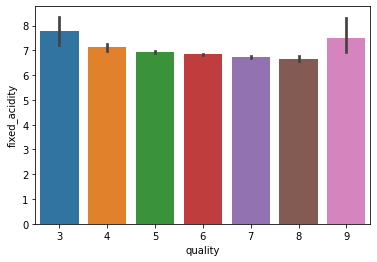

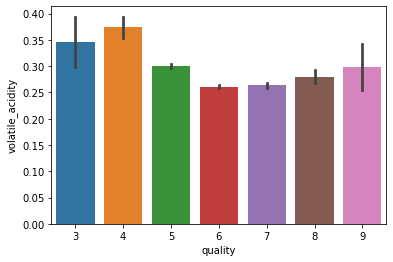

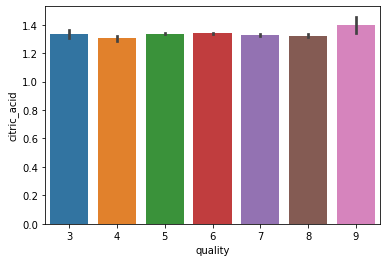

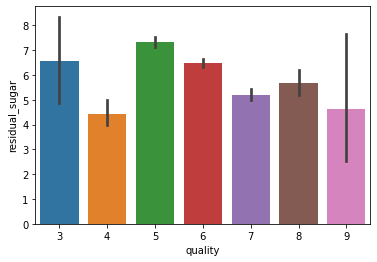

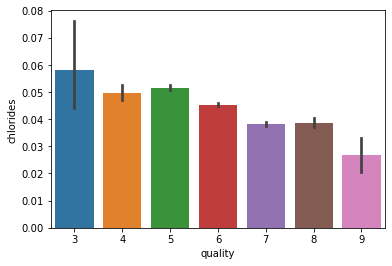

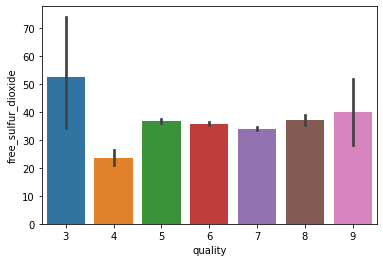

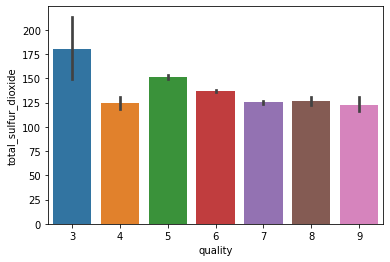

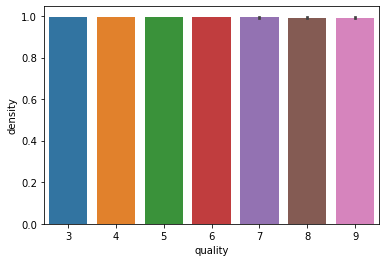

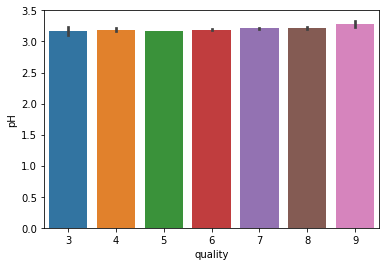

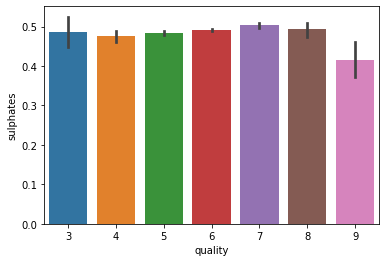

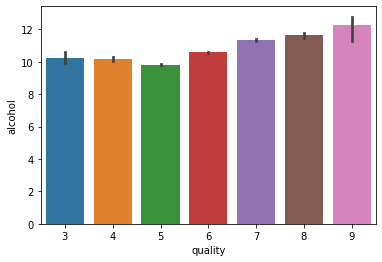

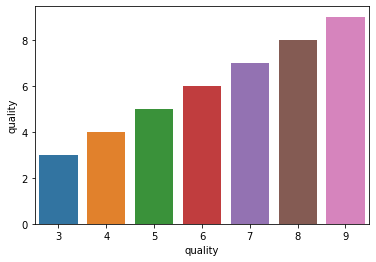

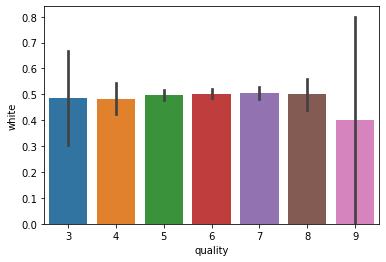

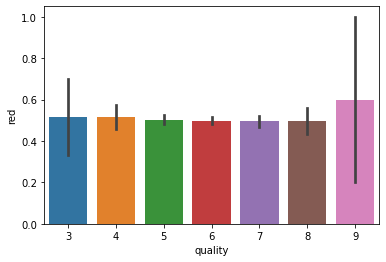

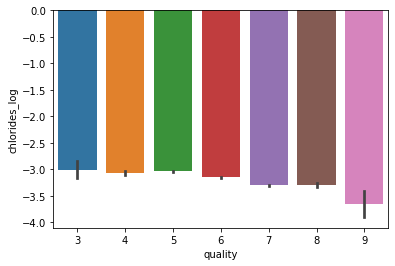

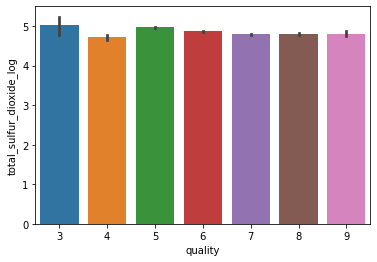

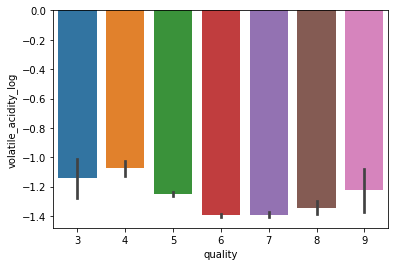

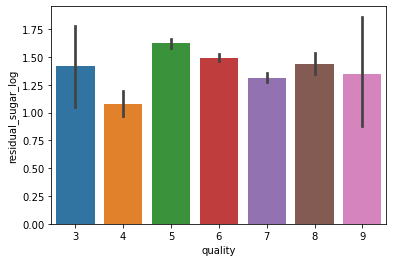

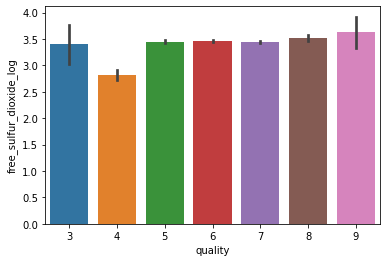

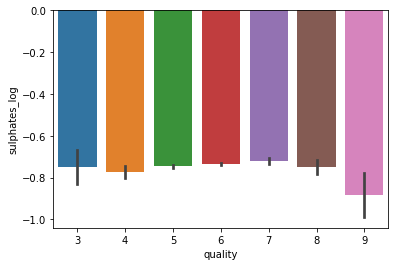

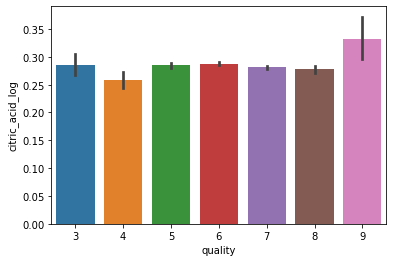

In [24]:
for column in train:
    sns.barplot(data=train, x='quality', y=column)
    plt.show()

In [25]:
data = ['fixed_acidity', 'citric_acid_log', 'pH', 'alcohol', 'white', 'red', 'chlorides_log', 'total_sulfur_dioxide_log', 'volatile_acidity_log', 'residual_sugar_log', 'free_sulfur_dioxide_log', 'sulphates_log']

In [26]:
for column in data:
    fig = plt.figure(figsize=(20, 20))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)

NameError: name 'model' is not defined

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Iteration 4

In [ ]:
f = 'quality ~ pH + alcohol + white + red + volatile_acidity_log + residual_sugar_log + sulphates_log'
model = ols(formula=f, data=train).fit()

In [ ]:
model.summary()

In [29]:
f = 'quality ~ fixed_acidity + alcohol + white + red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model_5 = ols(formula=f, data=train).fit()

In [30]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:04:05   Log-Likelihood:                -8790.5
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7826   BIC:                         1.767e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7389      0.152      4.865      0.000       0.441       1.037
fixed_acidity               -0.0543      0.010     -5.371      0.000      -0.074      -0.034
alcohol                      0.3555      0.009     39.759      0.000       0.338       0.373
white                        0.3736      0.076      4.889      0.000       0.224       0.523
red                          0.3653      0.076      4.782      0.000       0.216       0.515
chlorides_log               -0.1161      0.030     -3.923      0.000      -0.174      -0.058
total_sulfur_dioxide_log    -0.1541      0.037     -4.167      0.000      -0.227      -0.082
volatile_acidity_log        -0.5682      0.026    -21.527      0.000      -0.620      -0.516
residual_sugar_log           0.1340      0.011     12.602      0.000       0.113       0.155
free_sulfur_dioxide_log      0.2884      0.021     13.987      0.000       0.248       0.329
sulphates_log                0.2189      0.038      5.689      0.000       0.143       0.294
==============================================================================
Omnibus:                      152.344   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.341
Skew:                           0.112   Prob(JB):                     3.30e-64
Kurtosis:                       3.919   Cond. No.                     1.48e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
data.remove('pH')
data.remove('citric_acid_log')

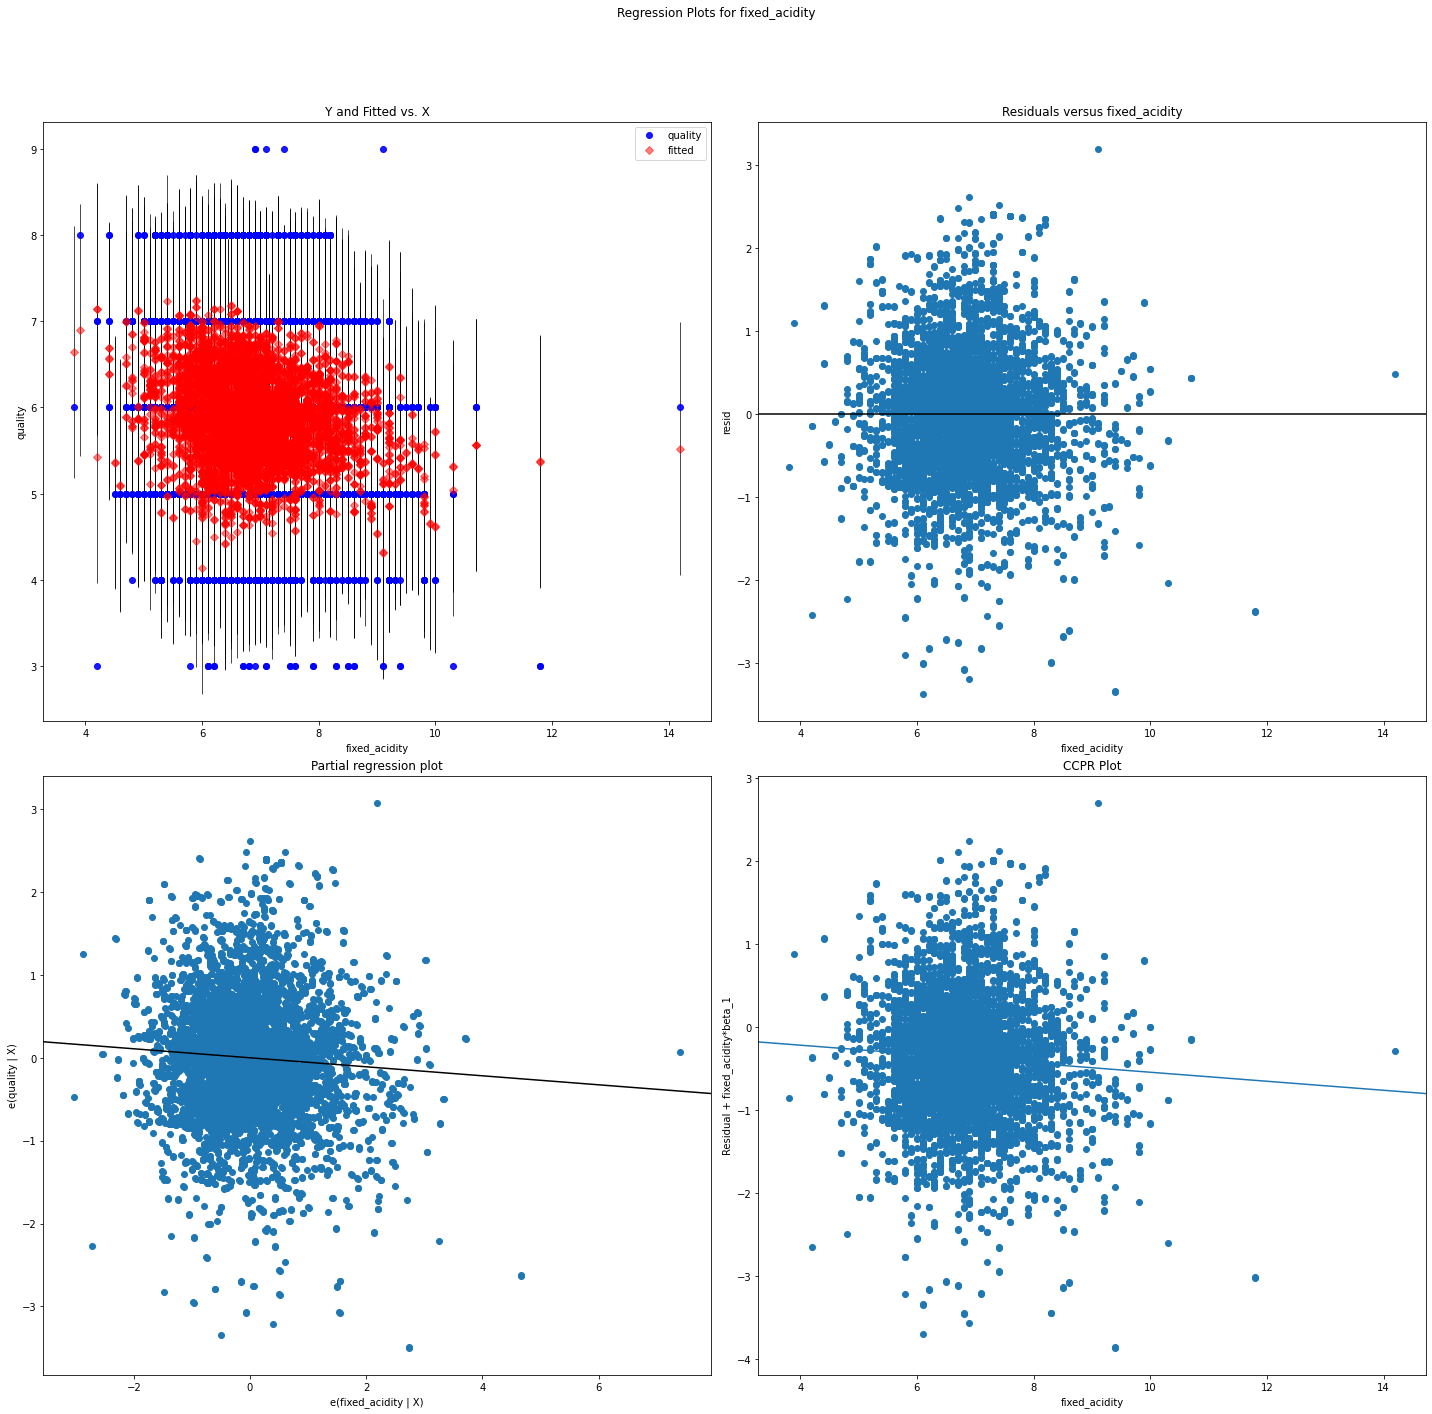

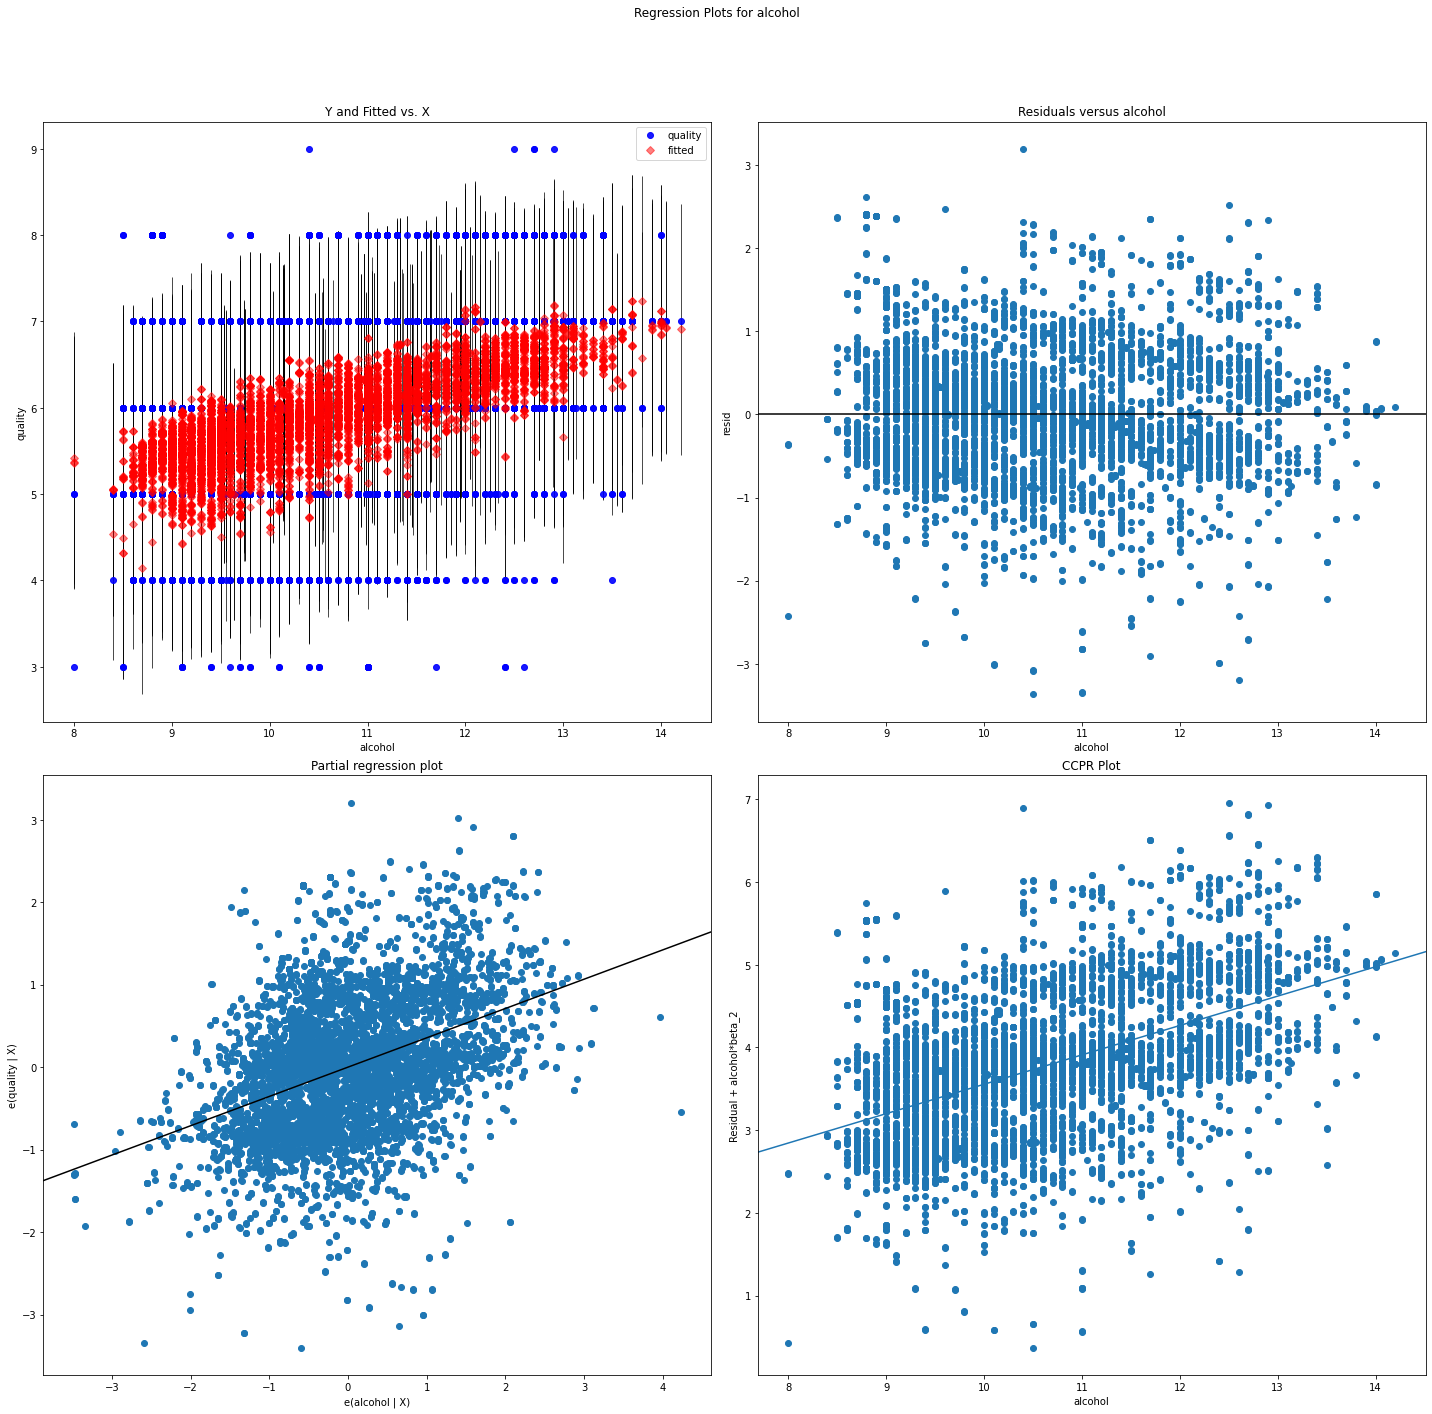

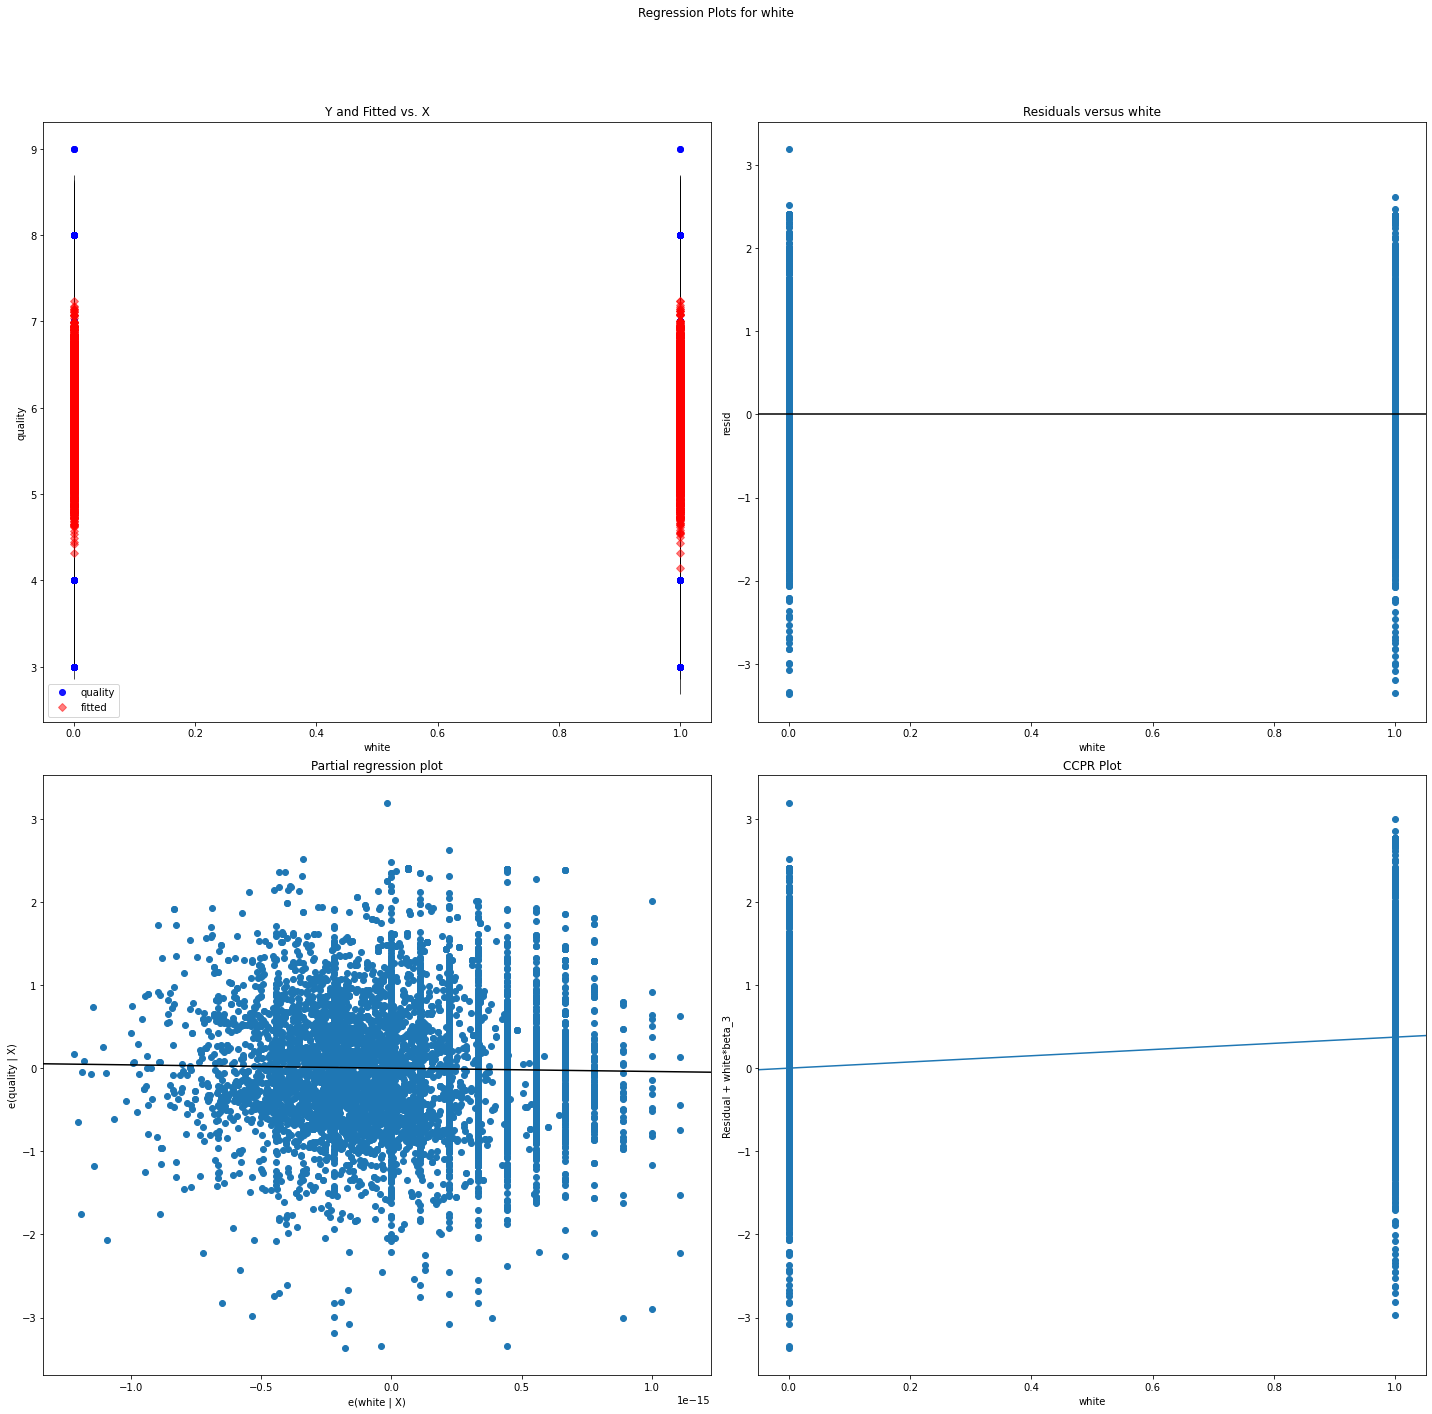

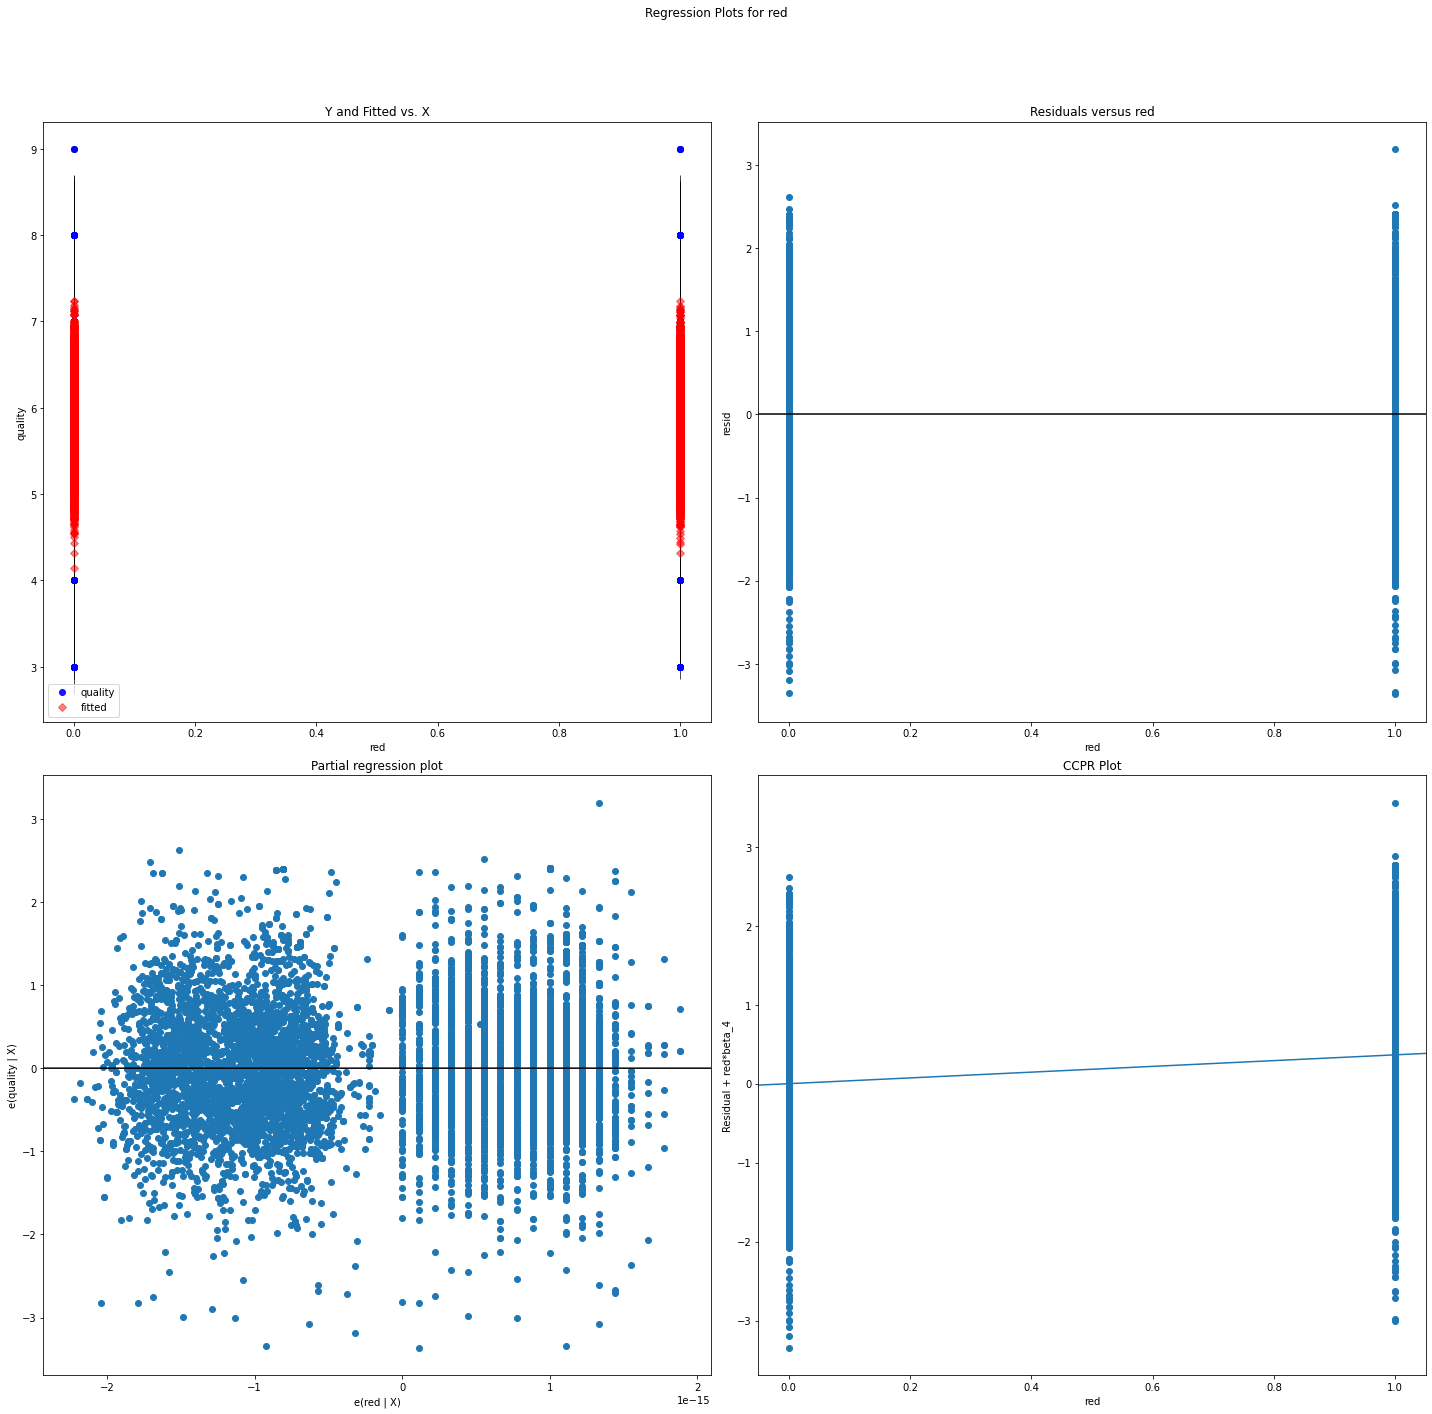

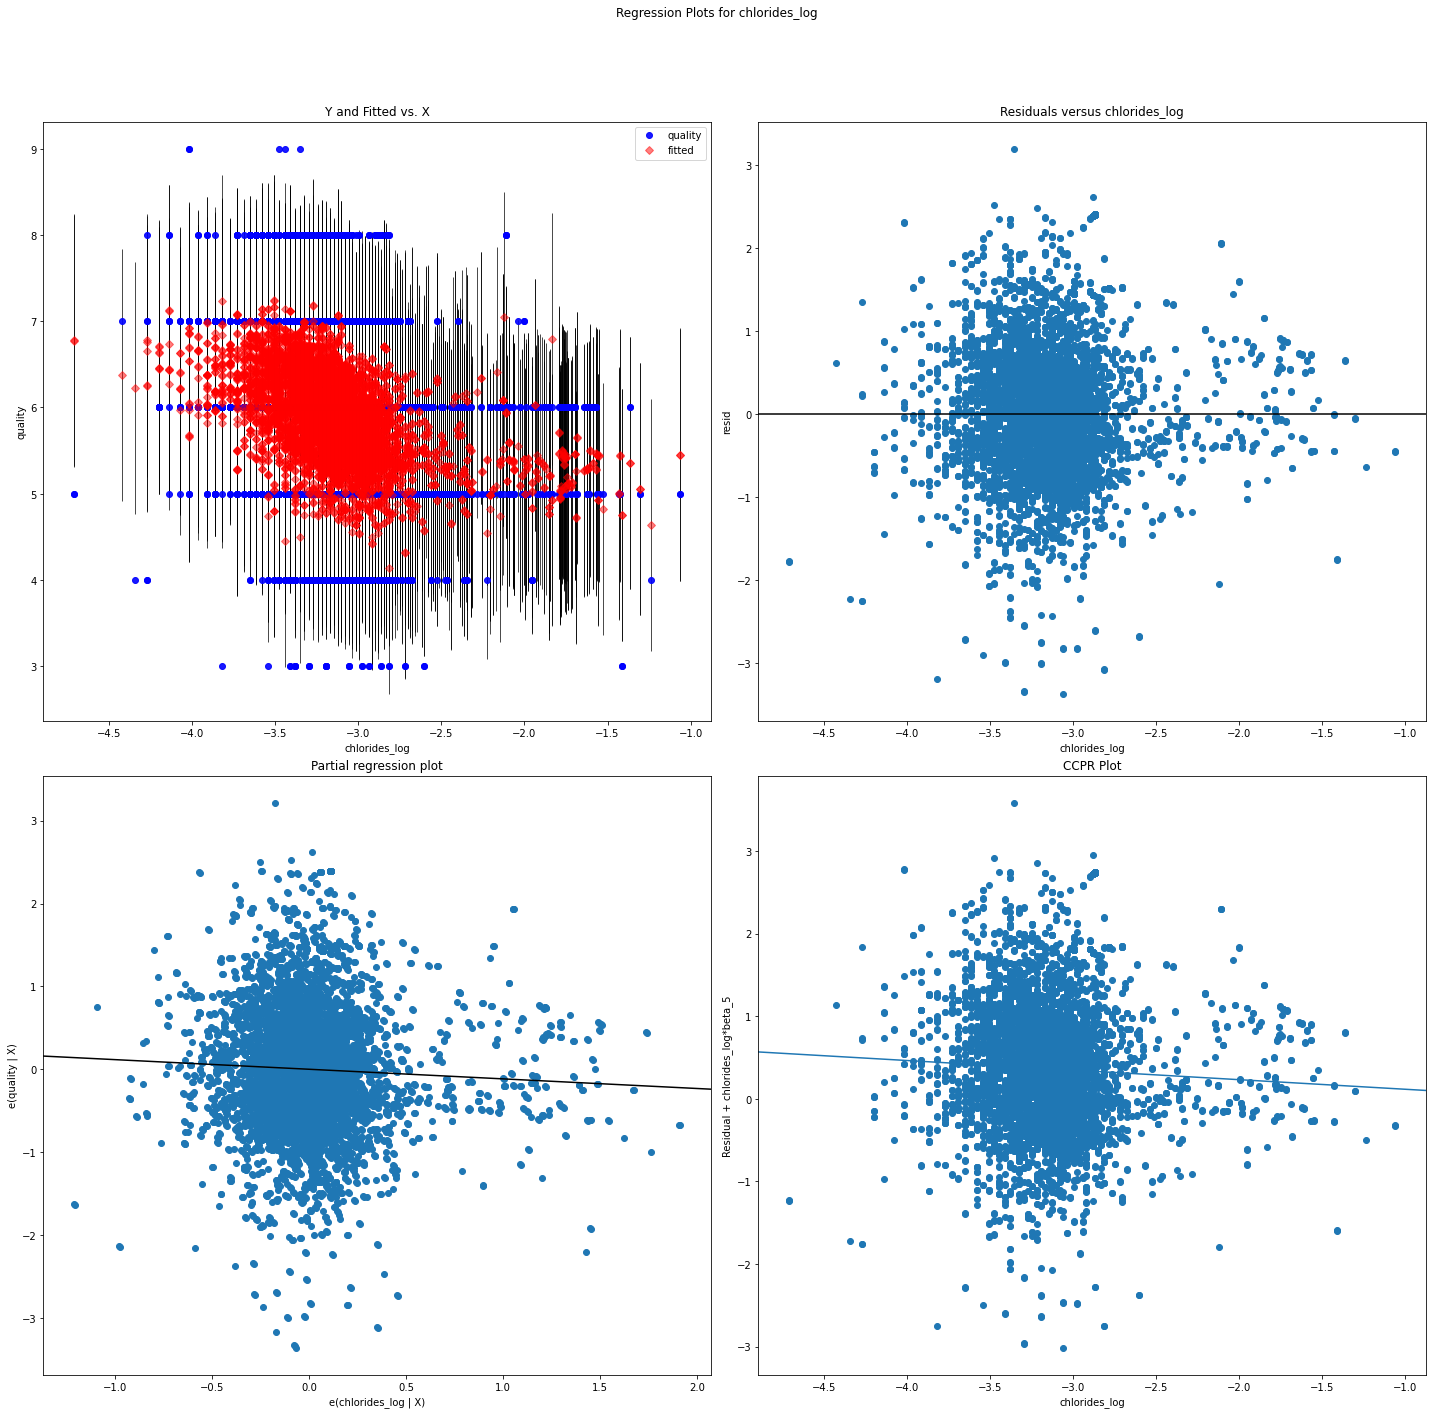

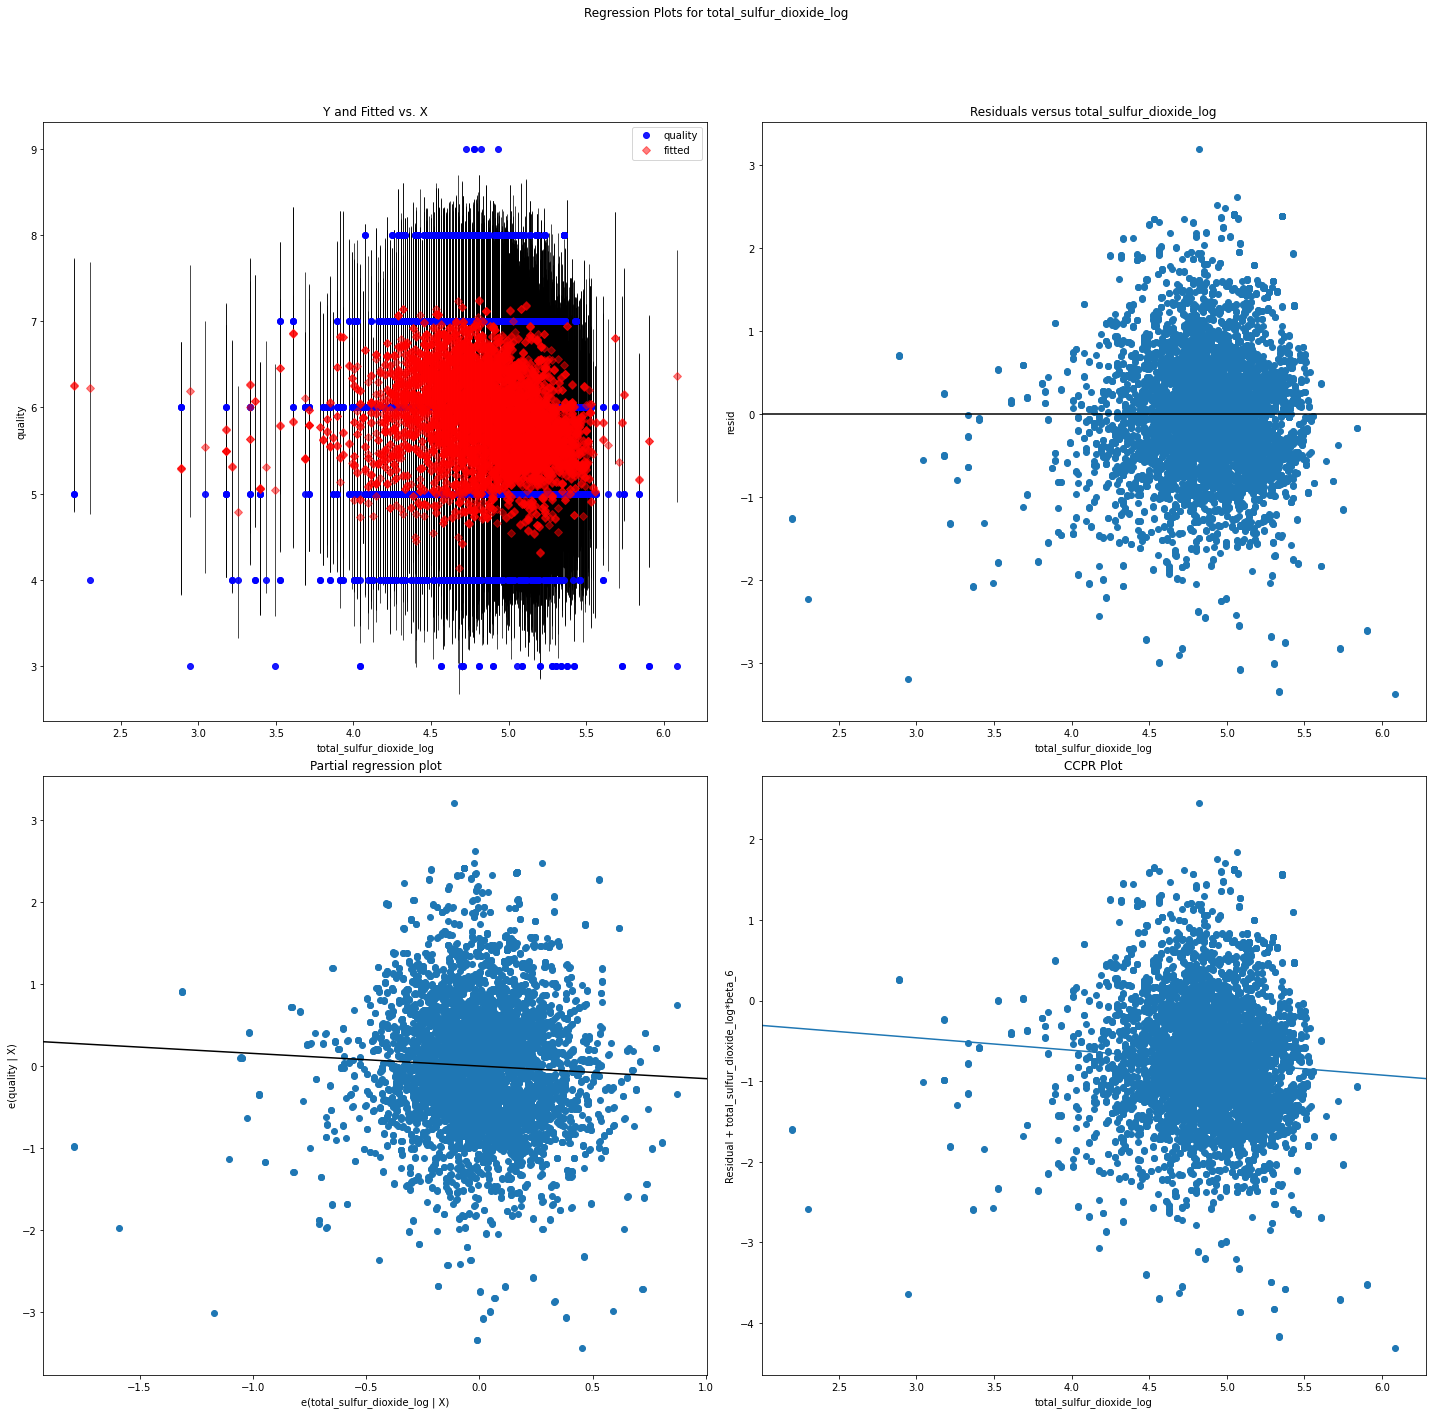

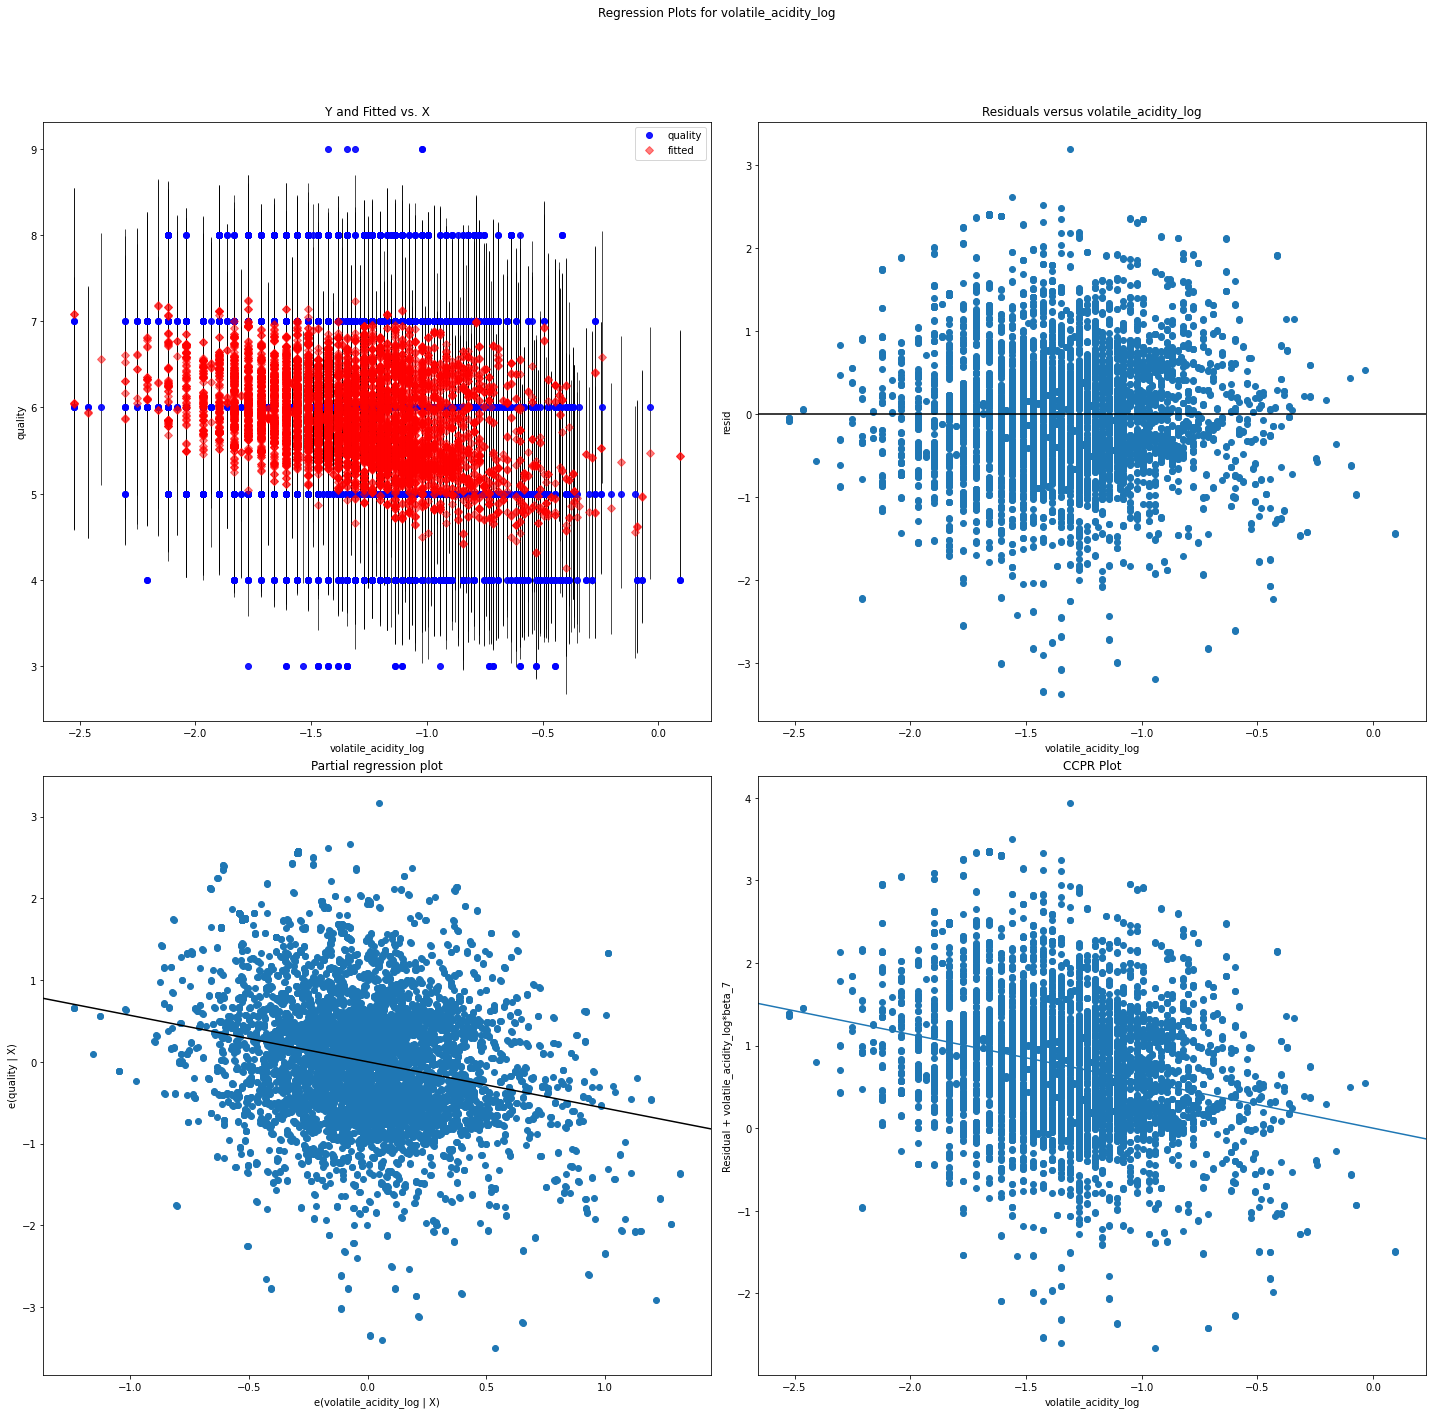

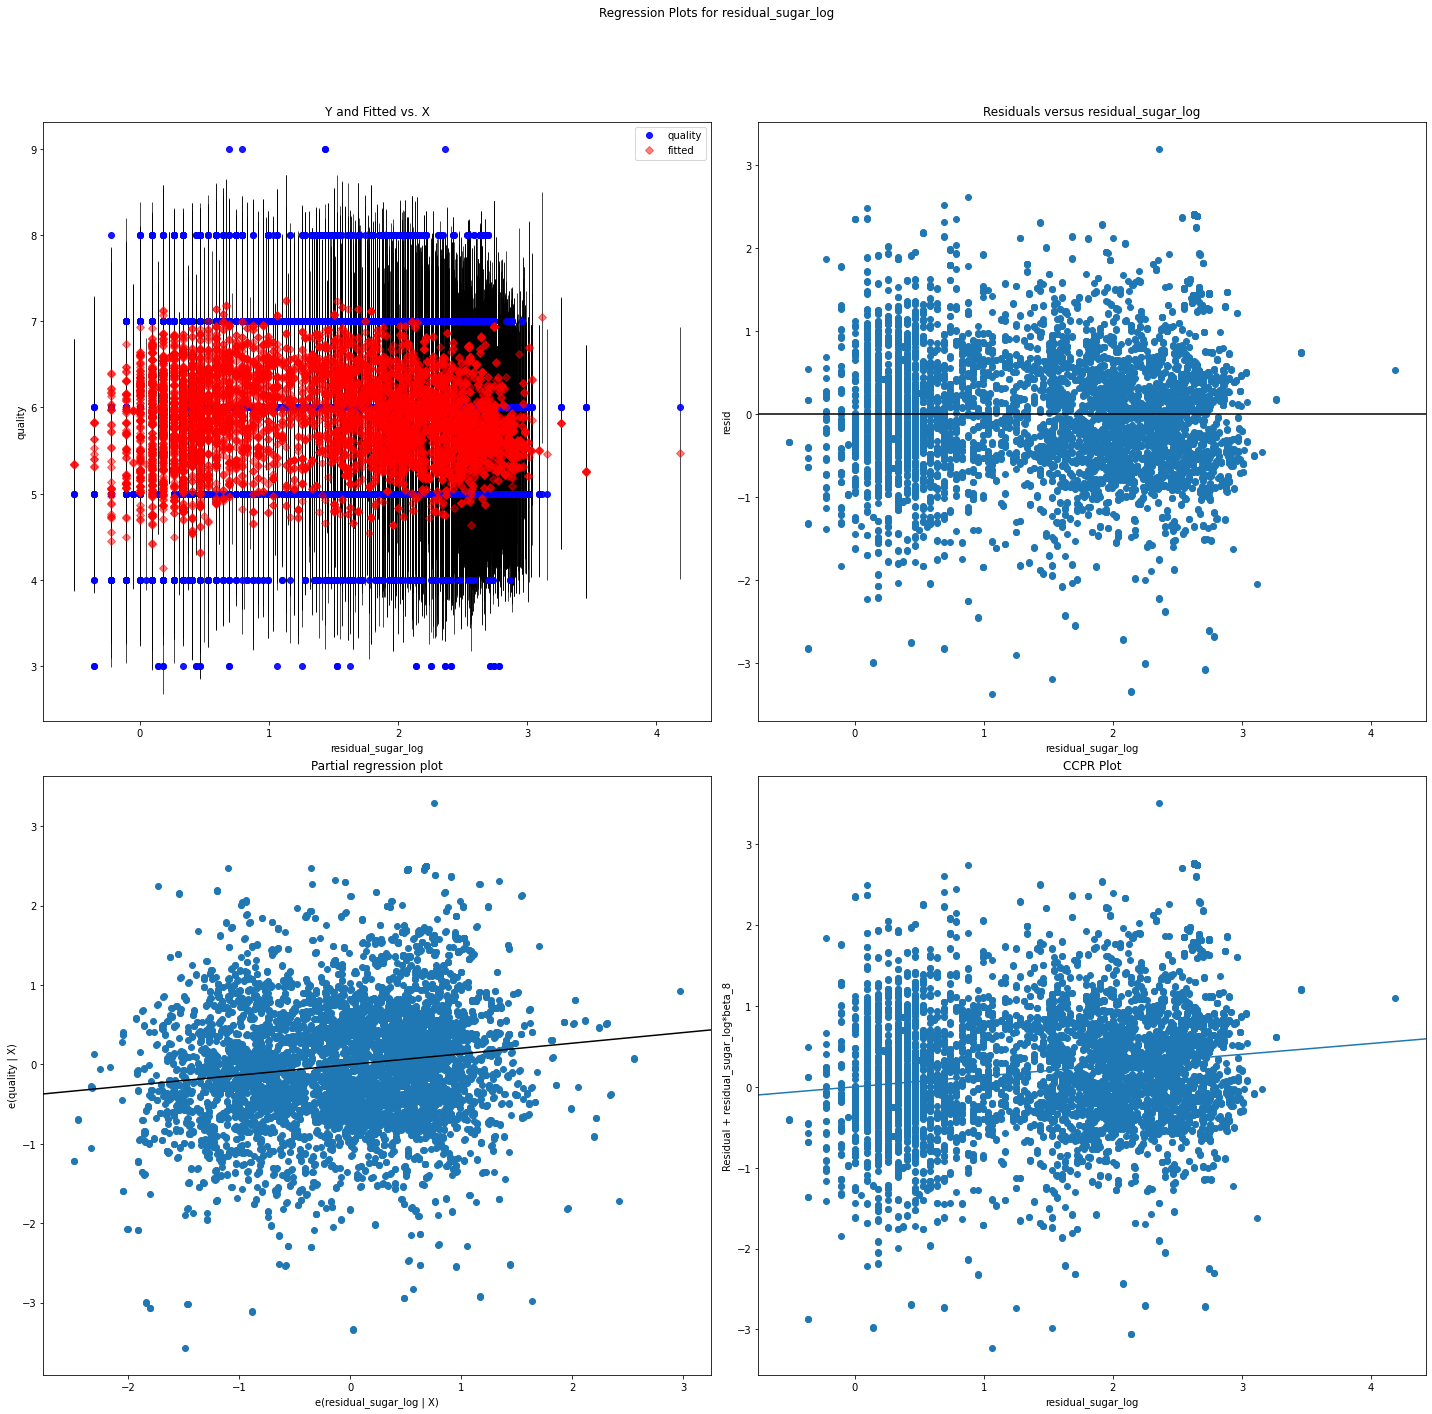

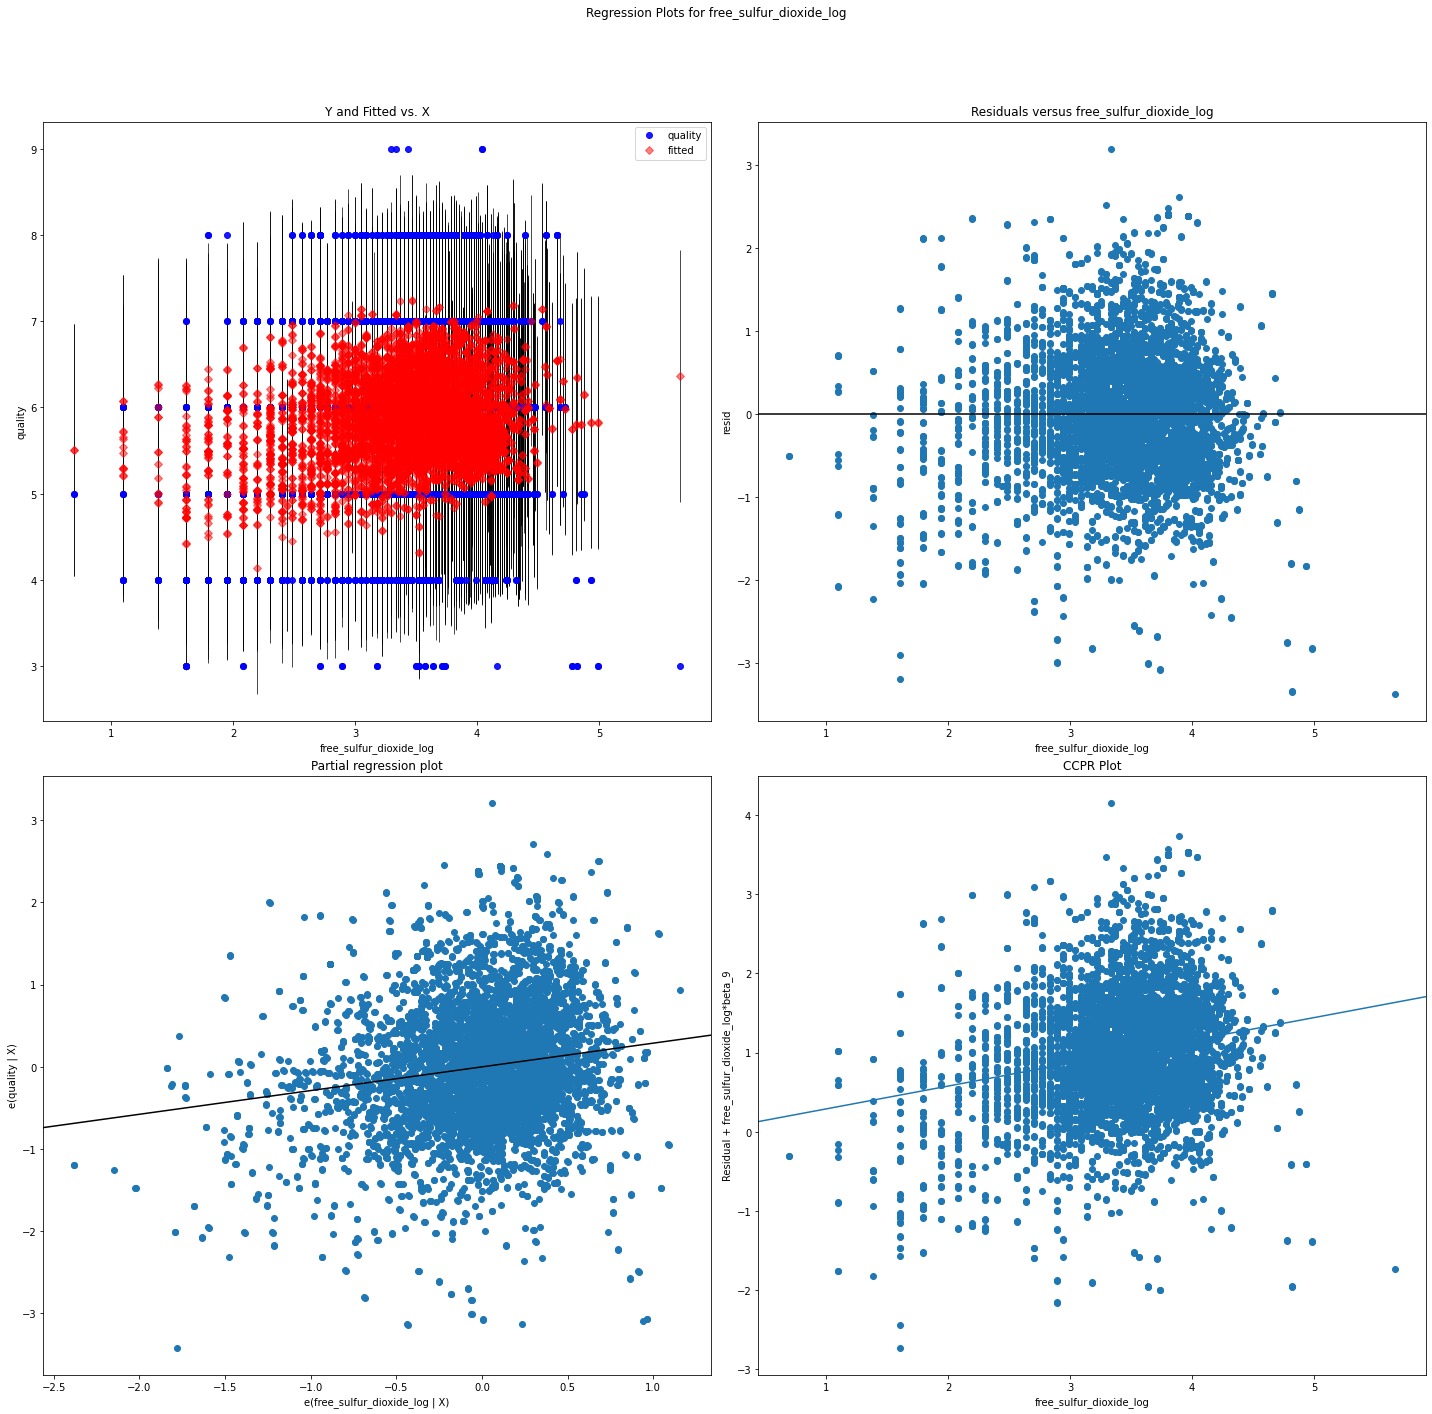

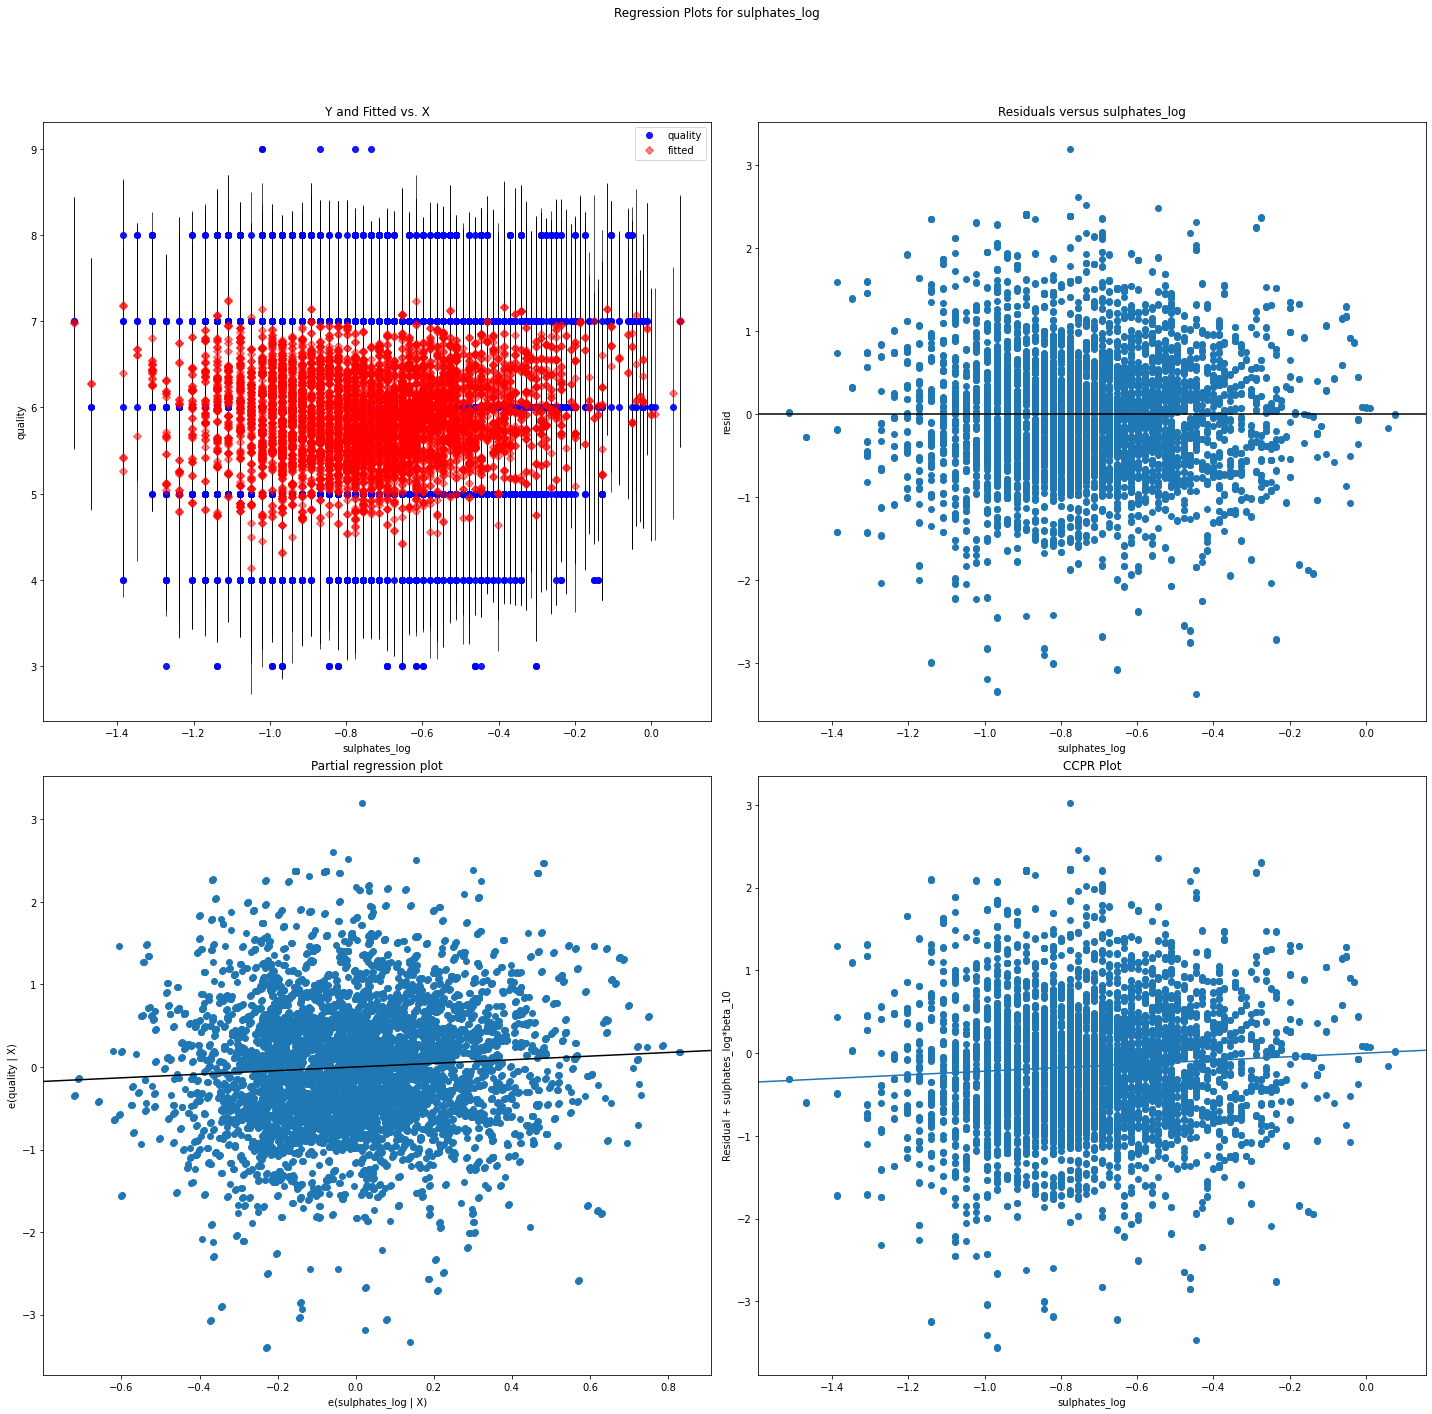

In [37]:
for column in data:
    fig = plt.figure(figsize=(20, 20))
    fig = sm.graphics.plot_regress_exog(model_5, column, fig=fig)

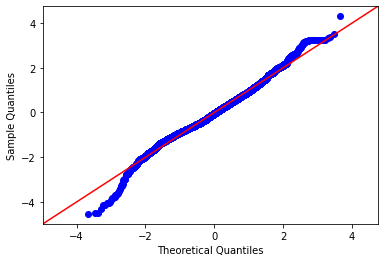

In [34]:
import scipy.stats as stats
residuals = model_5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)